# HEALTHCARE PROVIDER FRAUD DETECTION ANALYSIS

**Problem Statement** 

The goal of this project is to " predict the potentially fraudulent providers " based on the claims filed by them.along with this, we will also discover important variables helpful in detecting the behaviour of potentially fraud providers.

In [1]:
#importing necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
import re #regular expressions    

In [2]:
#for displaying all the columns
pd.set_option('display.max_columns', None)

In [3]:
#loading training datasets
train_bd = pd.read_csv("Train_Beneficiarydata.csv")
train_id = pd.read_csv("Train_Inpatientdata.csv")
train_od = pd.read_csv("Train_Outpatientdata.csv")
train_td = pd.read_csv("Train_target.csv")

In [4]:
#checking the shape of datasets
train_bd.shape, train_id.shape, train_od.shape, train_td.shape 

((138556, 25), (40474, 30), (517737, 27), (5410, 2))

In [5]:
train_bd.head() 

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [6]:
# printing first five rows of every datasets
train_id.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [7]:
# printing first five rows of every datasets
train_od.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [8]:
# printing first five rows of every datasets
train_td.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [9]:
#getting information from the dataset
train_bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [10]:
#getting information from the dataset
train_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [11]:
#getting information from the dataset
train_od.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [12]:
#getting information from the dataset
train_td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


# **Benificiary**

**Data PreProcessing and EDA**

In [13]:
#check for duplicate values
train_bd.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
138551    False
138552    False
138553    False
138554    False
138555    False
Length: 138556, dtype: bool

In [14]:
#dropping the duplicate values
train_bd = train_bd.drop_duplicates()

In [15]:
train_bd.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [16]:
#checking the datatypes
train_bd.dtypes

BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt          

**Null values**

In the Beneficiary dataset, DOD is the only column that mostly filled with NaN values.

<AxesSubplot:>

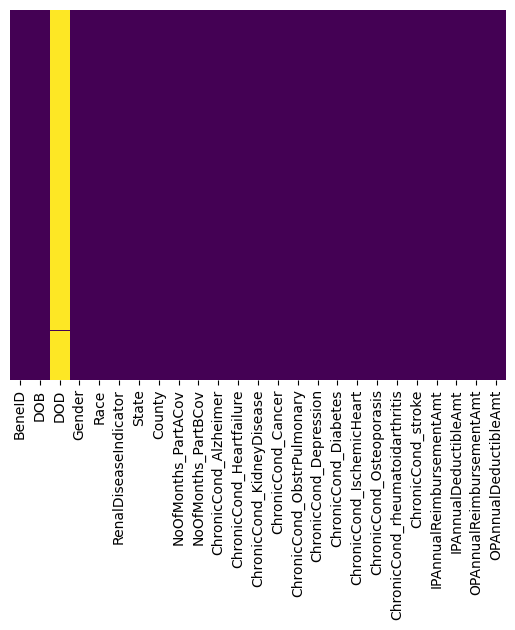

In [17]:
sns.heatmap(train_bd.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
train_bd['DOD'] = pd.to_datetime(train_bd['DOD'], format='%Y-%m-%d')
train_bd['DOB'] = pd.to_datetime(train_bd['DOB'], format='%Y-%m-%d')

In [19]:
train_bd["DOD"].max()

Timestamp('2009-12-01 00:00:00')

In [20]:
train_bd[train_bd.DOD == train_bd.DOD.max()]

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
6,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,1,1,2,2,2,2,1,2,1,1,2,0,0,1490,160
525,BENE11558,1927-12-01,2009-12-01,2,1,0,14,141,12,12,2,2,2,2,1,2,2,1,2,2,2,0,0,50,80
692,BENE11734,1929-04-01,2009-12-01,1,1,0,25,760,12,12,2,2,1,2,2,2,1,2,2,2,2,0,0,30,20
1667,BENE12787,1943-04-01,2009-12-01,1,1,0,42,450,12,12,2,2,2,1,2,1,2,2,1,2,2,0,0,1060,600
2766,BENE13946,1912-03-01,2009-12-01,2,1,0,15,450,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130779,BENE150858,1937-11-01,2009-12-01,1,1,0,31,200,12,12,2,2,2,2,2,2,2,2,1,2,2,0,0,1200,400
131036,BENE151130,1929-01-01,2009-12-01,1,1,0,5,400,12,12,2,1,2,1,1,1,1,1,2,2,2,7000,1068,100,0
135887,BENE156328,1936-10-01,2009-12-01,1,1,0,14,141,12,12,1,1,2,1,2,2,1,2,2,2,2,0,0,100,30
136789,BENE157302,1942-02-01,2009-12-01,1,1,0,23,680,12,12,2,2,2,2,2,2,2,1,2,2,2,0,0,1100,0


The most recent DOD value is December 1, 2009, which indicates that the Beneficiary Details data is from 2009.

Therefore NaN values in the DOD columns are filled with '2009-12-01'

In [21]:
train_bd["DOD"].fillna("2009-12-01", inplace = True)

**Adding Age column**

In [22]:
train_bd['Age'] = ((train_bd['DOD'] - train_bd['DOB']) / np.timedelta64(1, 'M')).astype(int) // 12 #specify the unit of time

In [23]:
train_bd.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,1943-01-01,2009-12-01,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,66
1,BENE11002,1936-09-01,2009-12-01,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50,73
2,BENE11003,1936-08-01,2009-12-01,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40,73
3,BENE11004,1922-07-01,2009-12-01,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,87
4,BENE11005,1935-09-01,2009-12-01,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200,74


In [24]:
train_bd.RenalDiseaseIndicator.value_counts()

0    118978
Y     19578
Name: RenalDiseaseIndicator, dtype: int64

In [25]:
#drop DOB Column
train_bd.drop(['DOB'], axis=1, inplace = True)

In [26]:
#drop DOD Column
train_bd.drop(['DOD'], axis=1, inplace = True)

In [27]:
train_bd['RenalDiseaseIndicator'] = train_bd['RenalDiseaseIndicator'].replace('Y', 1)

In [28]:
train_bd['RenalDiseaseIndicator'] = train_bd['RenalDiseaseIndicator'].astype('int64')

In [29]:
train_bd['Age'] = train_bd['Age'].astype('int64')

In [30]:
train_bd.dtypes

BeneID                             object
Gender                              int64
Race                                int64
RenalDiseaseIndicator               int64
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt            int64
OPAnnualDeductibleAmt               int64
Age                               

C:\Users\Anusha GS\AppData\Local\Temp\ipykernel_16124\891623826.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(17,1))


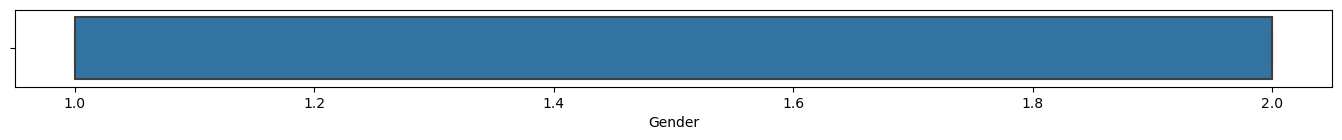

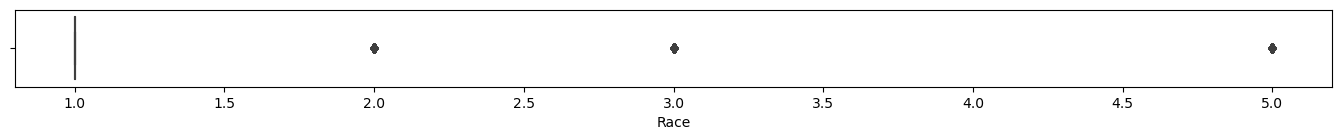

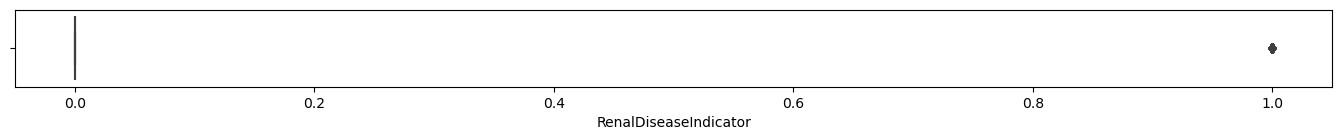

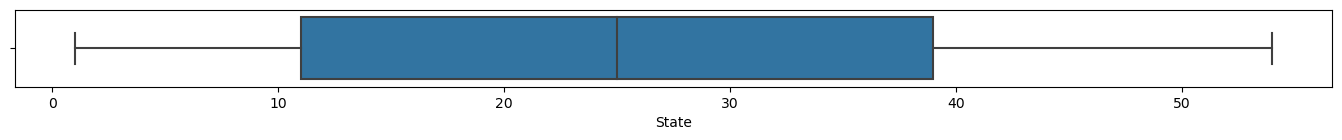

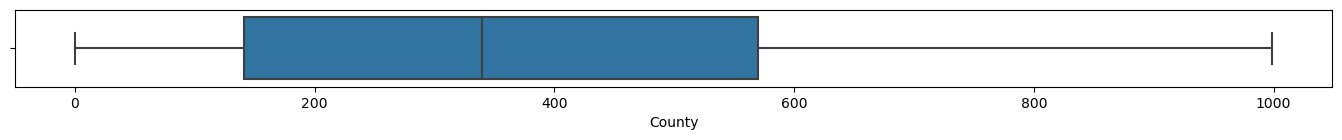

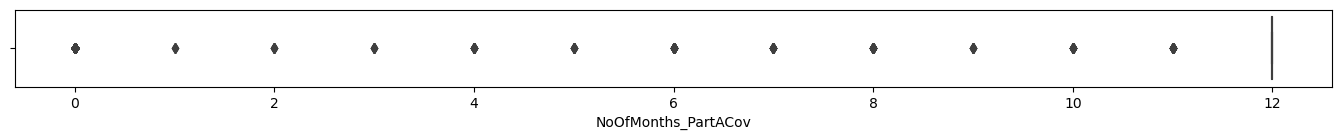

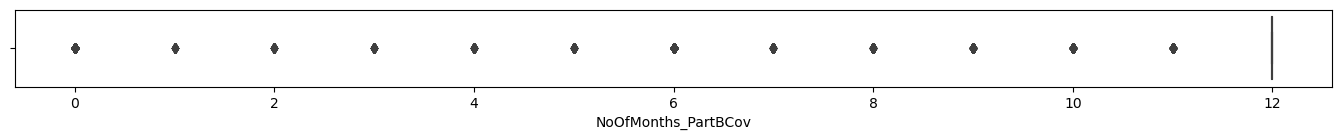

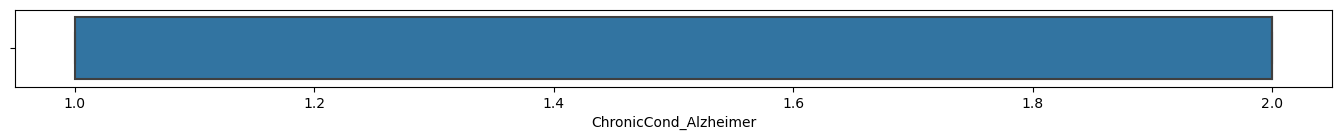

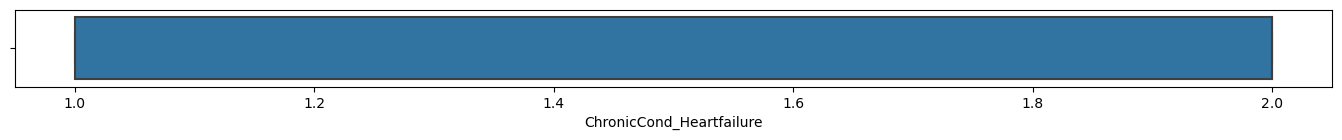

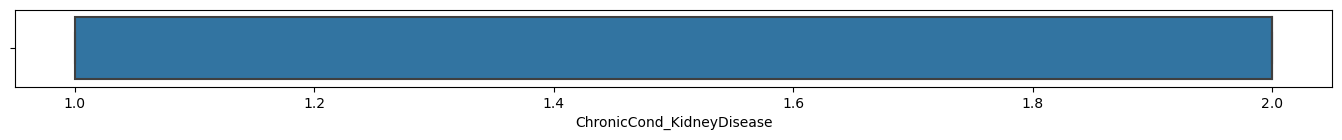

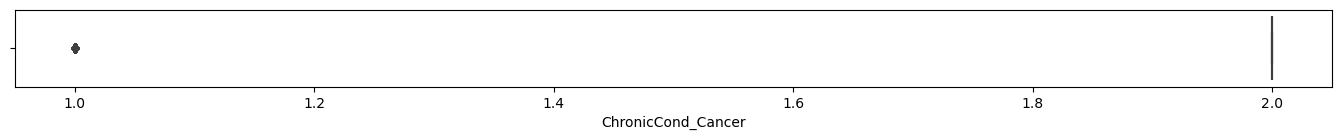

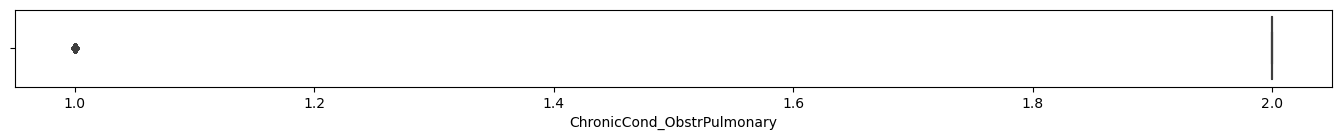

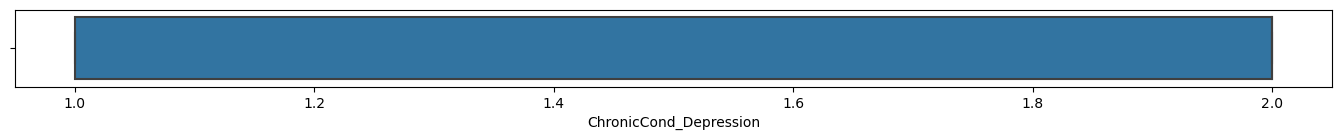

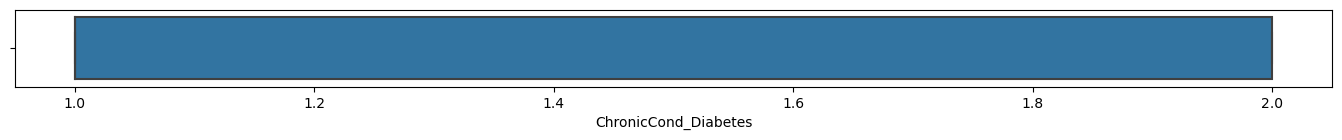

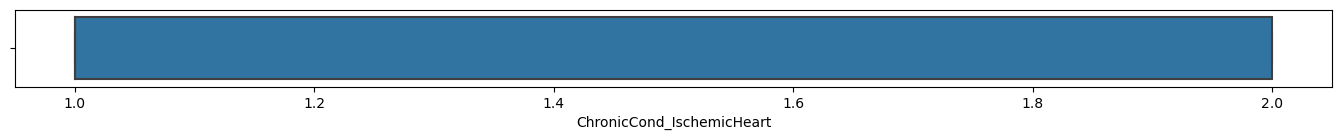

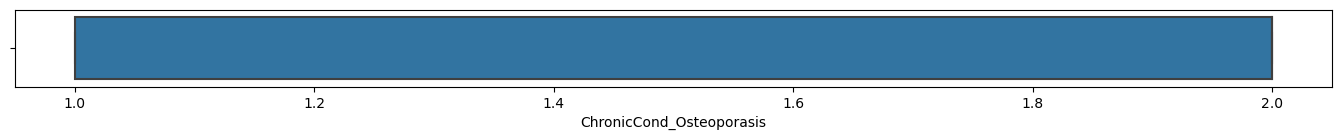

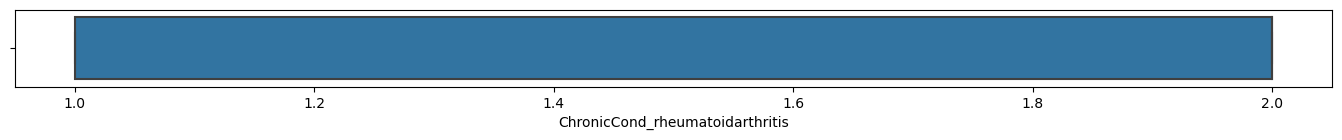

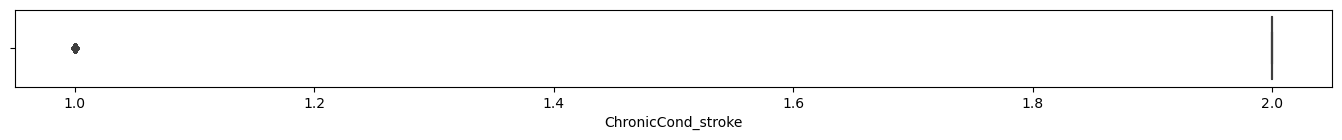

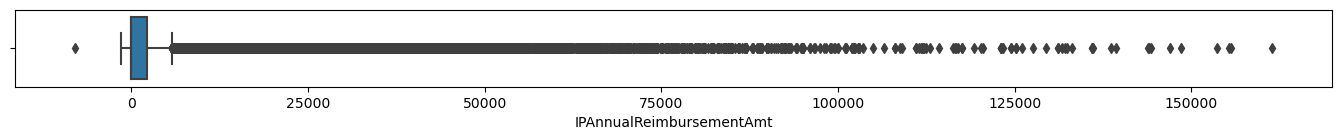

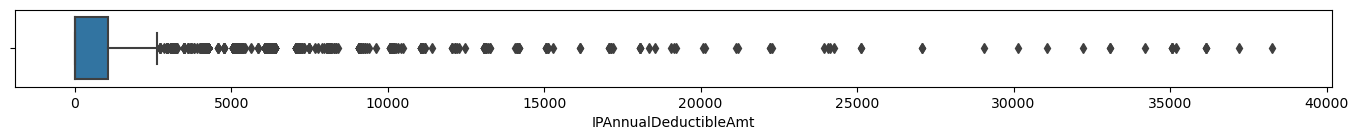

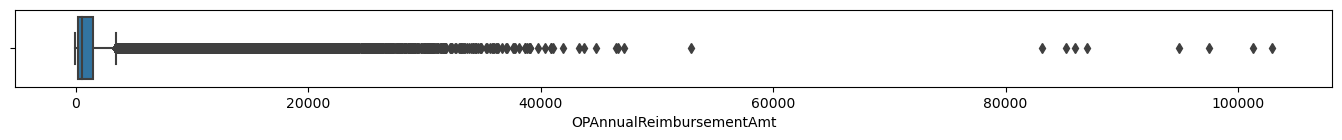

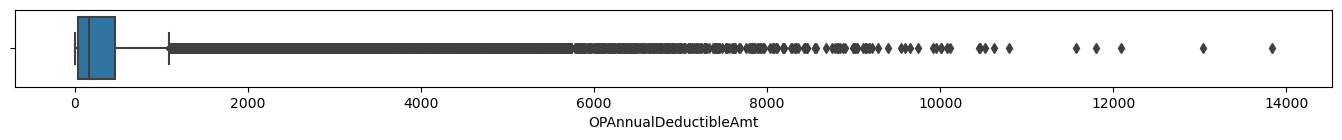

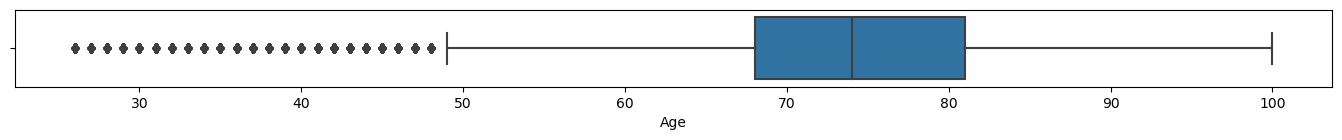

In [31]:
#Checking for Outliers
df1 = train_bd.select_dtypes(include=[np.number])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)

In [32]:
#to know the number of numerical and categorical features
num_data = train_bd.select_dtypes(exclude='object')
cat_data = train_bd.select_dtypes(include='object')

In [33]:
#detecting outliers
for col in num_data:

    q1=np.percentile(num_data[col],25) 
    q3=np.percentile(num_data[col],75)

    IQR=q3-q1
    
    print('Outliers for :',col,'\n')
  
    upper=q3+1.5*IQR

    lower=q1-1.5*IQR
   
    outliers=[]
    
    for i in num_data[col]:
        if(i<lower or i>upper):
            outliers.append(i)
    print("Outliers are:",outliers)
    print("\n")

Outliers for : Gender 

Outliers are: []


Outliers for : Race 

Outliers are: [2, 2, 2, 2, 3, 3, 2, 3, 5, 2, 3, 2, 5, 5, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 5, 2, 3, 3, 2, 2, 2, 5, 3, 2, 3, 2, 2, 2, 2, 3, 2, 5, 2, 3, 3, 3, 2, 2, 2, 2, 5, 3, 2, 2, 3, 3, 2, 3, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 5, 2, 2, 2, 3, 2, 2, 3, 2, 5, 3, 5, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 5, 3, 2, 2, 2, 2, 3, 3, 3, 2, 5, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 5, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 5, 5, 5, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 5, 2, 2, 2, 2, 2, 3, 5, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 5, 3, 3, 5, 2, 2, 2, 5, 2, 2, 2, 3, 5, 3, 2, 2, 2, 5, 3, 5, 2, 2, 2, 2, 2, 3, 3, 3, 3, 5, 3, 2, 5, 2, 5, 5, 2, 3, 2, 2, 2, 2, 5, 3, 3, 2, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 3, 2, 2, 2, 2, 5, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 5, 2, 2, 2,

Outliers are: []


Outliers for : County 

Outliers are: []


Outliers for : NoOfMonths_PartACov 

Outliers are: [0, 0, 0, 0, 3, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 10, 10, 11, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 0, 0, 0, 8, 4, 7, 0, 0, 0, 11, 0, 0, 0, 11, 0, 0, 0, 4, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 9, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 6, 7, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0,

Outliers are: []


Outliers for : ChronicCond_Heartfailure 

Outliers are: []


Outliers for : ChronicCond_KidneyDisease 

Outliers are: []


Outliers for : ChronicCond_Cancer 

Outliers are: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Outliers are: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

Outliers are: []


Outliers for : ChronicCond_IschemicHeart 

Outliers are: []


Outliers for : ChronicCond_Osteoporasis 

Outliers are: []


Outliers for : ChronicCond_rheumatoidarthritis 

Outliers are: []


Outliers for : ChronicCond_stroke 

Outliers are: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

Outliers are: [3204, 6068, 7068, 3204, 3204, 3204, 3204, 3204, 10204, 4272, 7068, 3204, 2936, 5340, 4272, 4272, 4272, 3204, 4272, 5136, 3204, 4272, 3204, 3204, 3204, 6068, 2936, 3204, 8068, 4272, 3204, 9068, 3204, 4272, 3204, 8068, 3204, 3204, 3204, 3204, 3204, 3204, 3204, 5136, 3204, 5340, 3204, 5136, 3204, 4272, 3136, 3136, 4272, 4272, 3204, 3204, 4272, 4272, 6408, 3204, 3068, 3204, 3204, 3204, 3204, 3204, 4272, 3068, 4272, 3204, 8068, 3204, 3204, 3204, 3068, 4004, 4272, 13136, 3204, 5340, 4272, 4068, 4272, 3204, 3204, 3204, 4272, 3204, 3068, 3204, 3204, 3204, 3204, 4136, 3204, 3204, 3204, 3204, 5340, 4068, 7136, 15068, 3204, 4272, 4272, 3204, 3204, 3204, 3204, 3204, 3204, 3204, 3204, 3204, 4272, 3204, 3204, 14068, 3204, 5340, 3204, 4272, 3204, 3204, 6068, 3204, 3204, 38272, 3204, 3204, 2936, 3204, 3204, 3204, 3204, 3204, 4272, 5136, 3204, 3204, 3204, 10068, 3204, 3204, 3204, 3204, 3204, 3204, 3204, 3204, 4136, 3204, 4272, 5068, 3204, 3204, 3204, 3136, 3204, 3204, 6136, 3204, 3204, 3

Outliers are: [1200, 1740, 1480, 3160, 1580, 1170, 1720, 1250, 1340, 5858, 1670, 1340, 2630, 5070, 1350, 1100, 2420, 2130, 3450, 1100, 1150, 1220, 1260, 1600, 1890, 1260, 7200, 1950, 1310, 5210, 1100, 1240, 6330, 1500, 1740, 1130, 1400, 1120, 1350, 4500, 1170, 1460, 1120, 2090, 2310, 1230, 1270, 2010, 1210, 2520, 1510, 1780, 1260, 1130, 1200, 1200, 1320, 1880, 1290, 1300, 1660, 2560, 1110, 1220, 2480, 1190, 1400, 1200, 1320, 1110, 1510, 2060, 1210, 1100, 1230, 1310, 2720, 1560, 1270, 1410, 1280, 5440, 2040, 1290, 1280, 1120, 1570, 1150, 1370, 1400, 1570, 1150, 3450, 1120, 1560, 5200, 1150, 1950, 1610, 1100, 4810, 2210, 1960, 2300, 1200, 1590, 1170, 2830, 1540, 1300, 8460, 1260, 1750, 1740, 1100, 1570, 1460, 1460, 3450, 1180, 1450, 1110, 1700, 1190, 2330, 1100, 1390, 1690, 1120, 1460, 4780, 1330, 2040, 1380, 2010, 1690, 1280, 1530, 2860, 1120, 1320, 1150, 1220, 1710, 1500, 1130, 6210, 1460, 1360, 2890, 1260, 1590, 1690, 1170, 1540, 1310, 1330, 1640, 3900, 5890, 1260, 1300, 1200, 1120, 6

In [34]:
#treating outliers
for col in num_data:
    tenth_percentile=np.percentile(num_data[col],10)
    ninetieth_percentile=np.percentile(num_data[col],90)
    print(tenth_percentile,ninetieth_percentile)
    num_data[col]=np.where(num_data[col]<tenth_percentile,tenth_percentile,num_data[col]) 
    num_data[col]=np.where(num_data[col]>ninetieth_percentile,ninetieth_percentile,num_data[col])

1.0 2.0
1.0 2.0
0.0 1.0
5.0 45.0
50.0 780.0
12.0 12.0
12.0 12.0
1.0 2.0
1.0 2.0


C:\Users\Anusha GS\AppData\Local\Temp\ipykernel_16124\1014142777.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[col]=np.where(num_data[col]<tenth_percentile,tenth_percentile,num_data[col])
C:\Users\Anusha GS\AppData\Local\Temp\ipykernel_16124\1014142777.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[col]=np.where(num_data[col]>ninetieth_percentile,ninetieth_percentile,num_data[col])


1.0 2.0
1.0 2.0
1.0 2.0
1.0 2.0
1.0 2.0
1.0 2.0
1.0 2.0
1.0 2.0
2.0 2.0
0.0 12000.0
0.0 1068.0
60.0 3230.0
0.0 1000.0
57.0 88.0


In [35]:
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

**Gender**

The gender column has a roughly even distribution of data, however the second gender accounts for 15% more entries.



C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


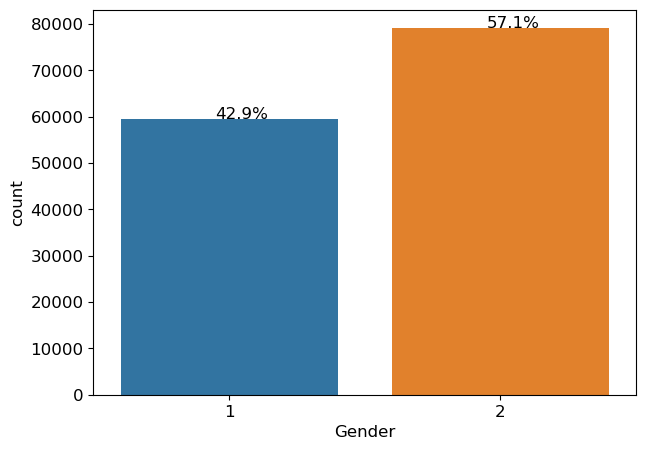

In [36]:
plt.figure(figsize=(7,5))
ax = sns.countplot('Gender', data = train_bd)
plt.xticks(size = 12)
plt.xlabel('Gender', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,train_bd.Gender)

**Race**

Race column has a data spread dominated by 1.


C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


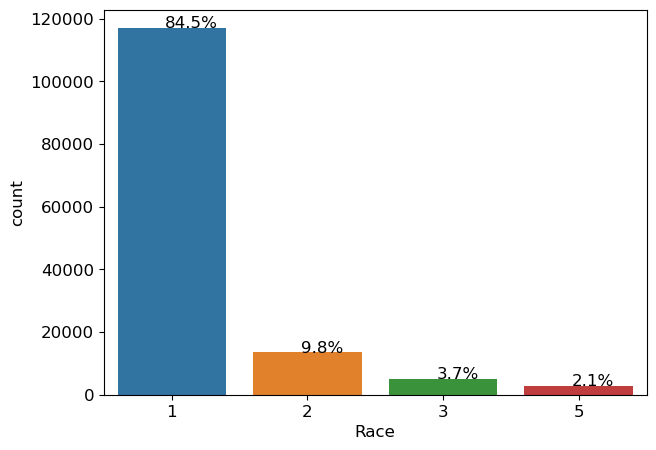

In [37]:
plt.figure(figsize=(7,5))
ax = sns.countplot('Race', data = train_bd)
plt.xticks(size = 12)
plt.xlabel('Race', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,train_bd.Race)

**Age**

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


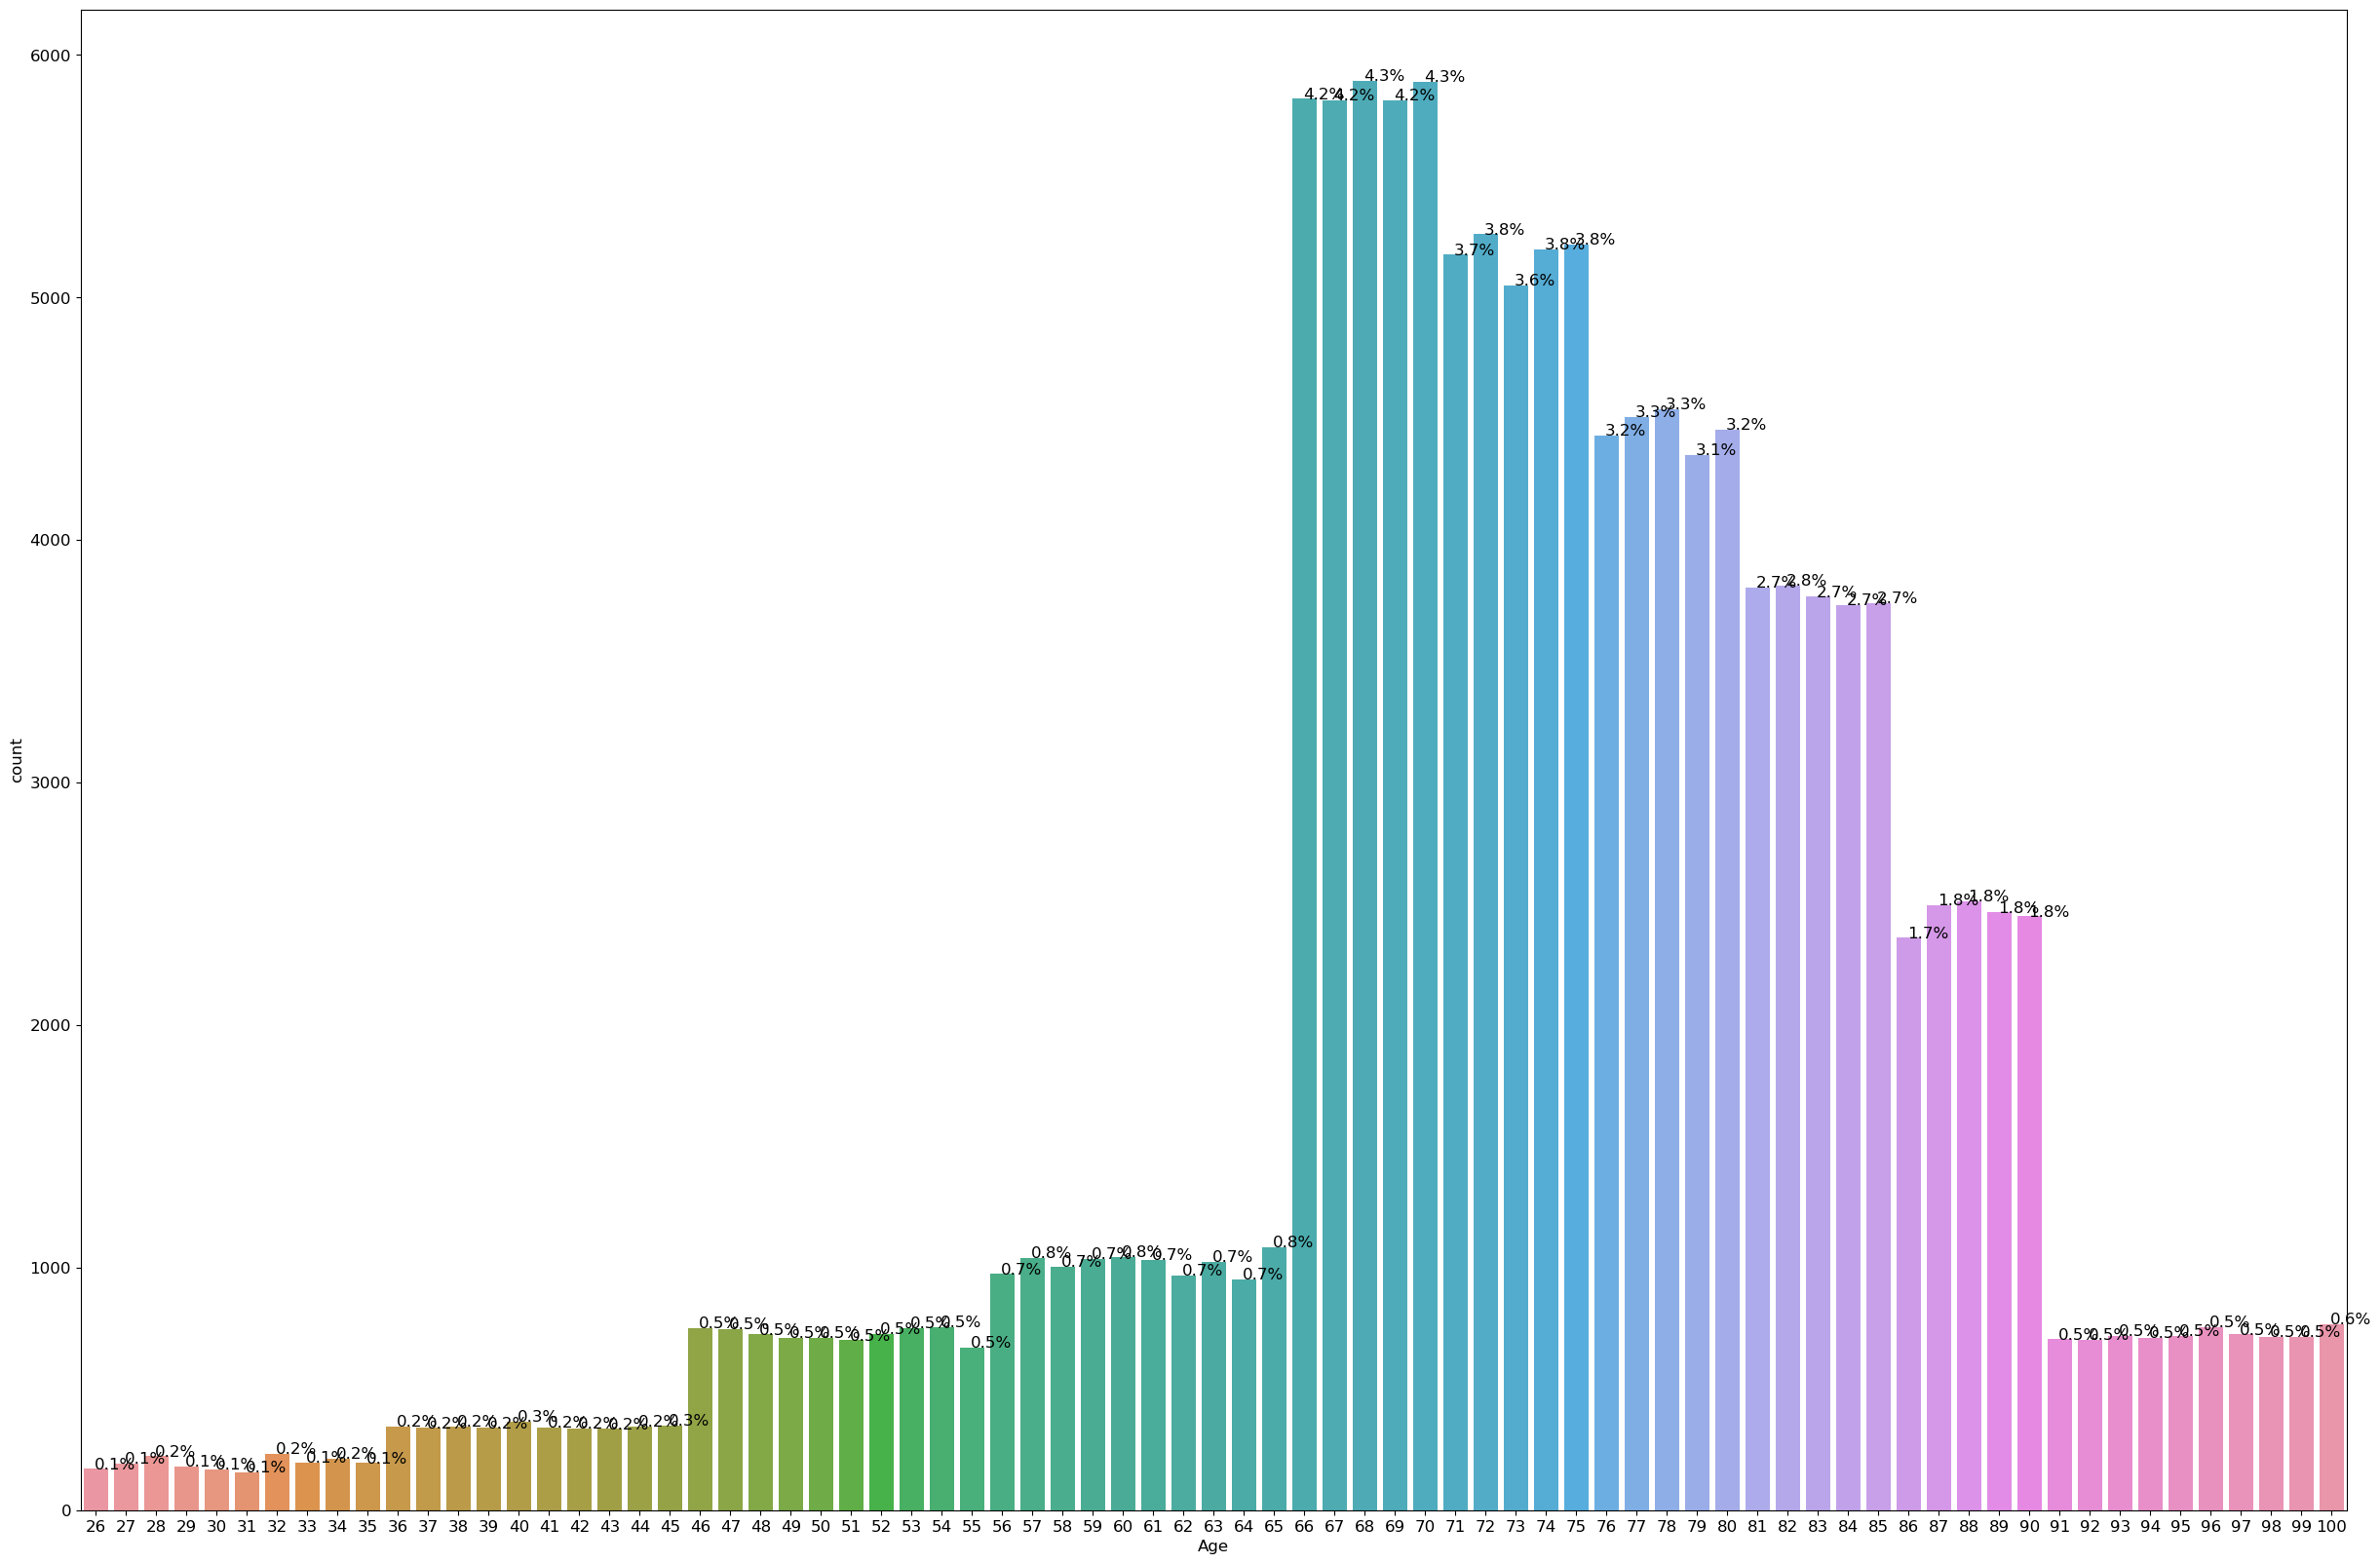

In [38]:
plt.figure(figsize=(30,20))
ax = sns.countplot('Age', data = train_bd)
plt.xticks(size = 12)
plt.xlabel('Age', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,train_bd.Age)

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


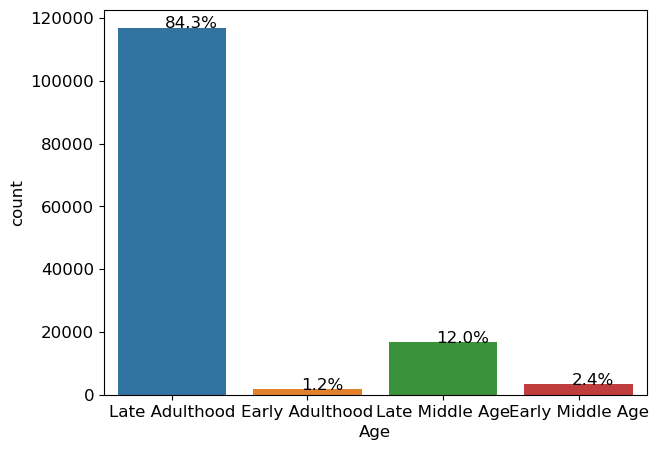

In [39]:
conditions = [
    (train_bd['Age'] <= 34),
    (train_bd['Age'] > 34) & (train_bd['Age'] <= 44),
    (train_bd['Age'] >= 45) & (train_bd['Age'] <= 64),
    (train_bd['Age'] >= 65)
    ]

values = ['Early Adulthood','Early Middle Age','Late Middle Age' ,'Late Adulthood']
train_bd['Age'] = np.select(conditions, values)

plt.figure(figsize=(7,5))
ax = sns.countplot('Age', data = train_bd)
plt.xticks(size = 12)
plt.xlabel('Age', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,train_bd.Age)

**State**

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


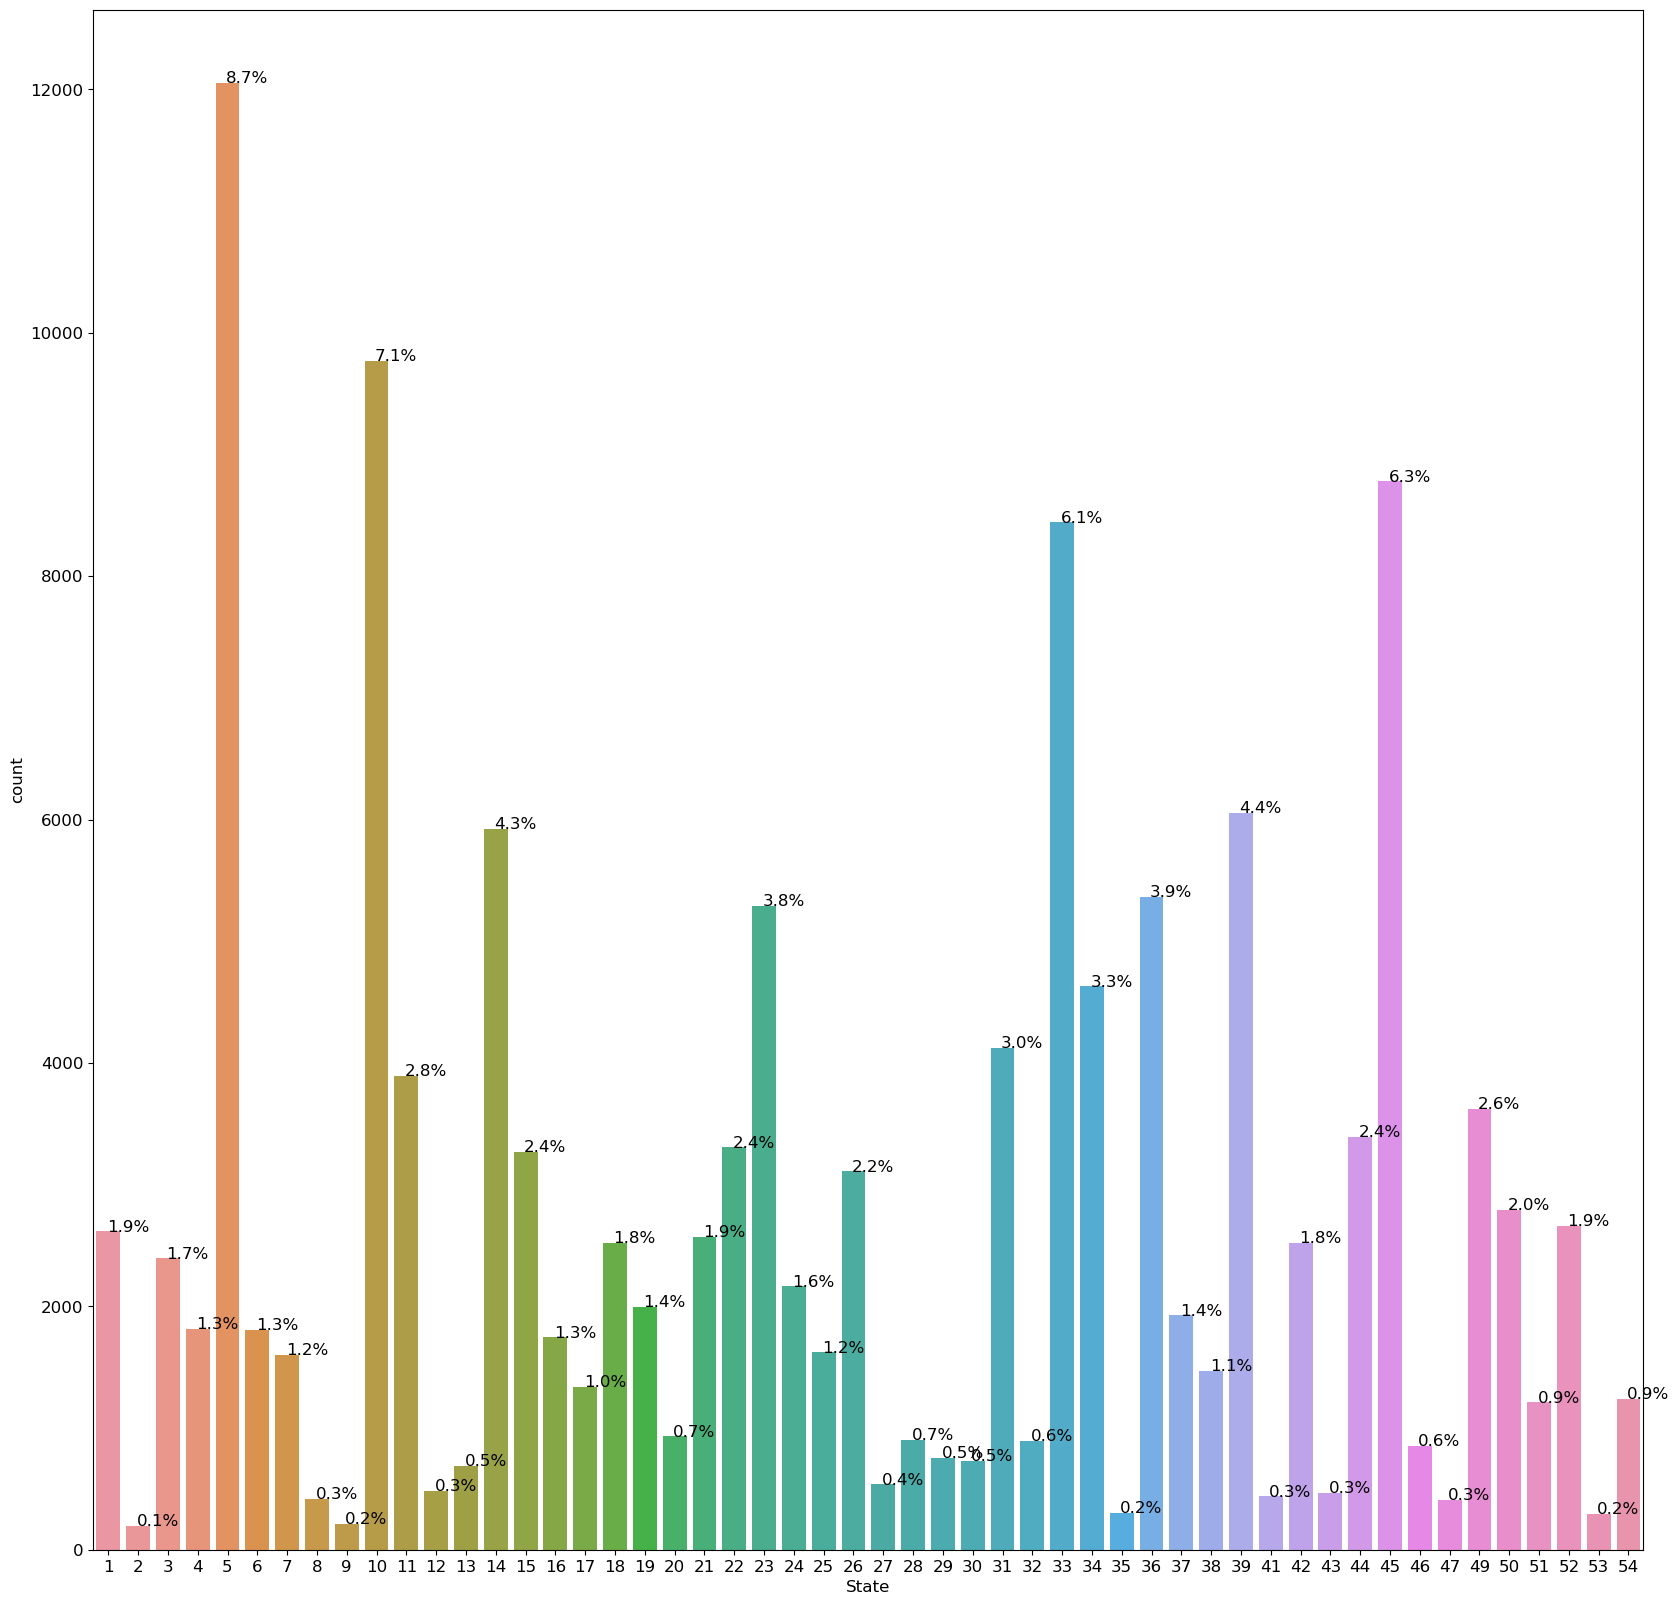

In [40]:
plt.figure(figsize=(20,20))
ax = sns.countplot('State', data = train_bd)
plt.xticks(size = 12)
plt.xlabel('State', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,train_bd.State)

**RenalDiseaseIndicator**

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


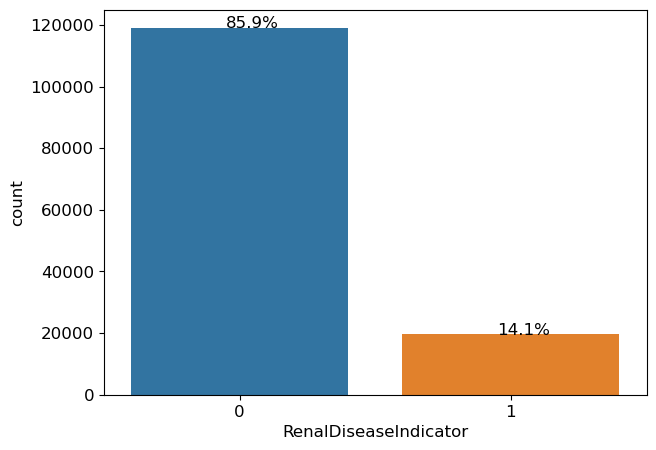

In [46]:
plt.figure(figsize=(7,5))
ax = sns.countplot('RenalDiseaseIndicator', data = train_bd)
plt.xticks(size = 12)
plt.xlabel('RenalDiseaseIndicator', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,train_bd.RenalDiseaseIndicator)

**NoOfMonths_PartACov**

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


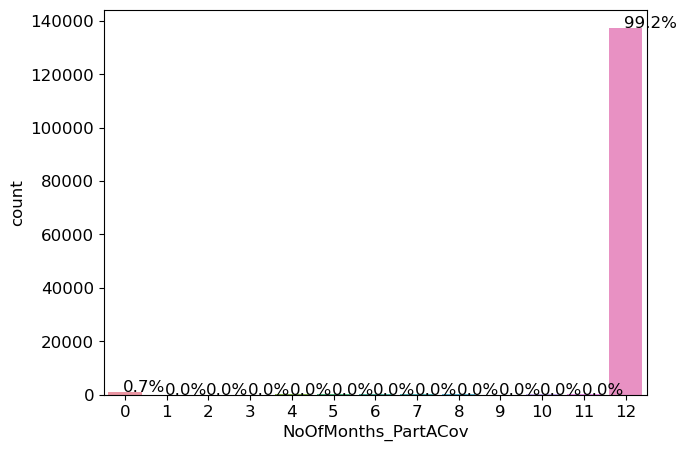

In [47]:
plt.figure(figsize=(7,5))
ax = sns.countplot('NoOfMonths_PartACov', data = train_bd)
plt.xticks(size = 12)
plt.xlabel('NoOfMonths_PartACov', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,train_bd.NoOfMonths_PartACov)

In [48]:
train_bd = train_bd.drop('NoOfMonths_PartACov', axis=1)

**NoOfMonths_PartBCov**

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


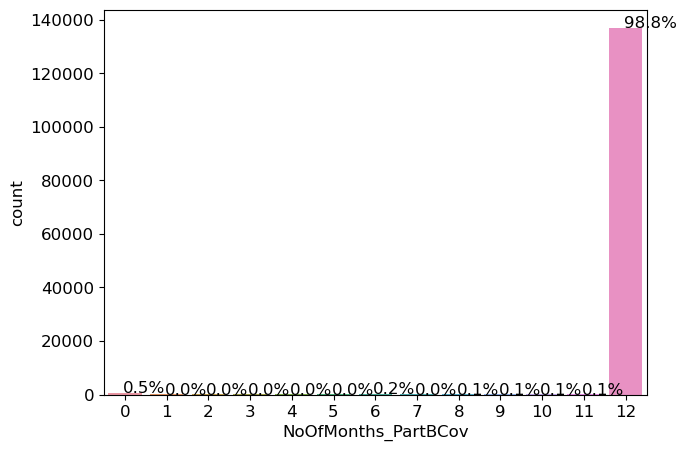

In [49]:
plt.figure(figsize=(7,5))
ax = sns.countplot('NoOfMonths_PartBCov', data = train_bd)
plt.xticks(size = 12)
plt.xlabel('NoOfMonths_PartBCov', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,train_bd.NoOfMonths_PartBCov)

In [50]:
train_bd = train_bd.drop('NoOfMonths_PartBCov', axis=1)

**ChronicCond_Alzheimer**

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


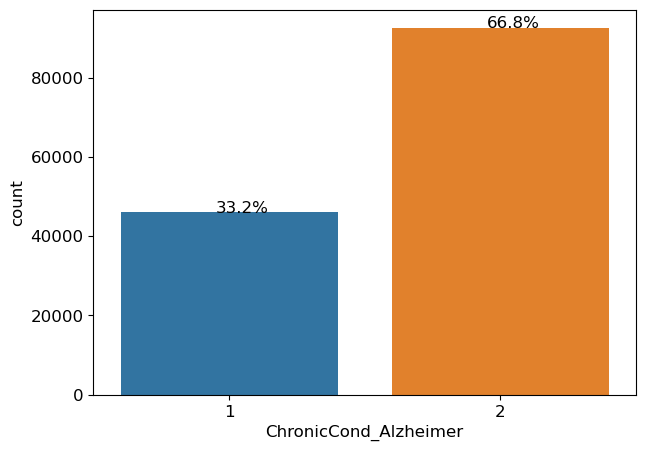

In [51]:
plt.figure(figsize=(7,5))
ax = sns.countplot('ChronicCond_Alzheimer', data = train_bd)
plt.xticks(size = 12)
plt.xlabel('ChronicCond_Alzheimer', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,train_bd.ChronicCond_Alzheimer)

**ChronicCond_Heartfailure**

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


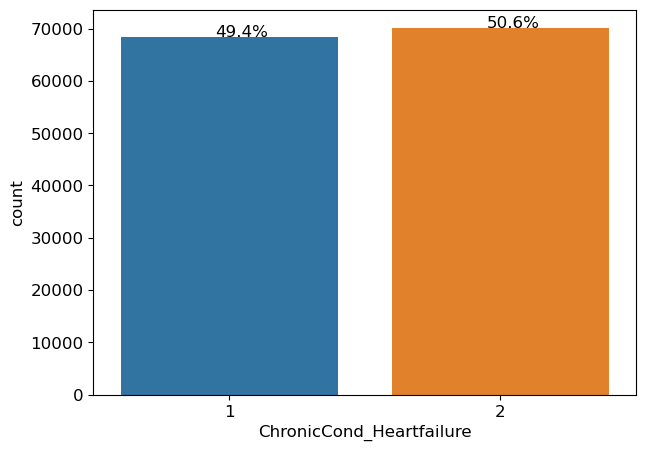

In [52]:
plt.figure(figsize=(7,5))
ax = sns.countplot('ChronicCond_Heartfailure', data = train_bd)
plt.xticks(size = 12)
plt.xlabel('ChronicCond_Heartfailure', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,train_bd.ChronicCond_Heartfailure)

**ChronicCond_KidneyDisease**

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


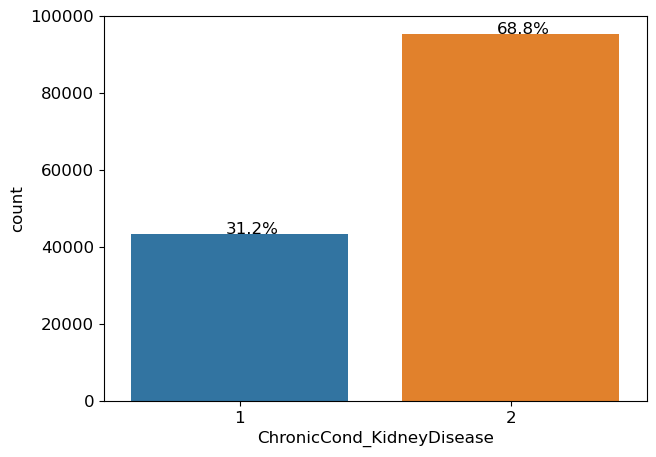

In [53]:
plt.figure(figsize=(7,5))
ax = sns.countplot('ChronicCond_KidneyDisease', data = train_bd)
plt.xticks(size = 12)
plt.xlabel('ChronicCond_KidneyDisease', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,train_bd.ChronicCond_KidneyDisease)

**ChronicCond_Cancer**

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


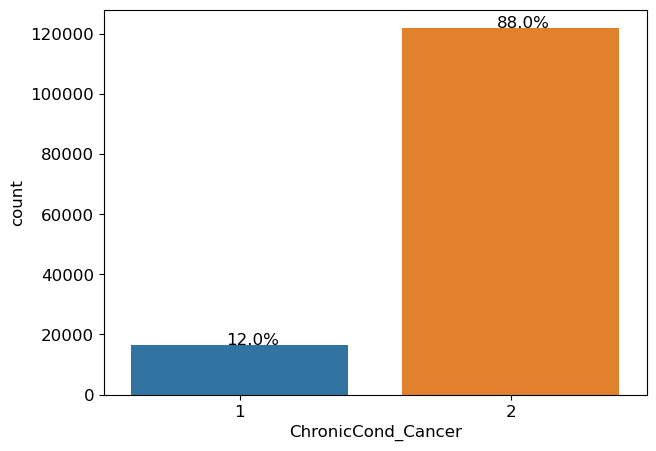

In [54]:
plt.figure(figsize=(7,5))
ax = sns.countplot('ChronicCond_Cancer', data = train_bd)
plt.xticks(size = 12)
plt.xlabel('ChronicCond_Cancer', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,train_bd.ChronicCond_Cancer)

**ChronicCond_ObstrPulmonary**

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


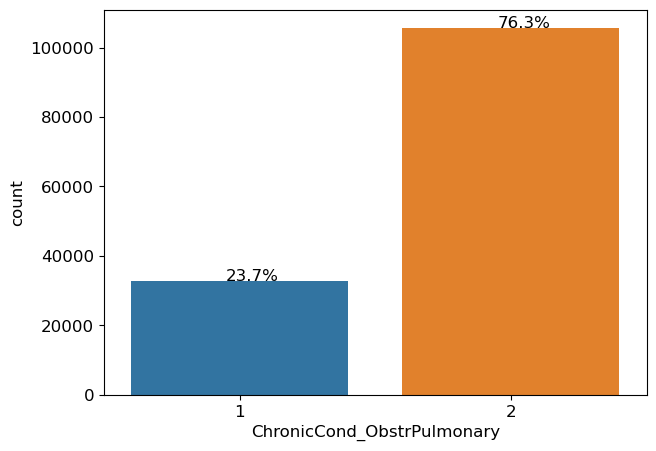

In [55]:
plt.figure(figsize=(7,5))
ax = sns.countplot('ChronicCond_ObstrPulmonary', data = train_bd)
plt.xticks(size = 12)
plt.xlabel('ChronicCond_ObstrPulmonary', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,train_bd.ChronicCond_ObstrPulmonary)

**ChronicCond_Depression**

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


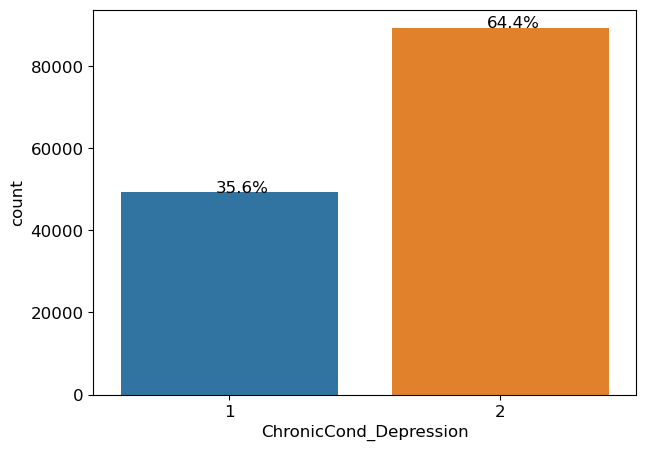

In [56]:
plt.figure(figsize=(7,5))
ax = sns.countplot('ChronicCond_Depression', data = train_bd)
plt.xticks(size = 12)
plt.xlabel('ChronicCond_Depression', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,train_bd.ChronicCond_Depression)

**ChronicCond_Diabetes**

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


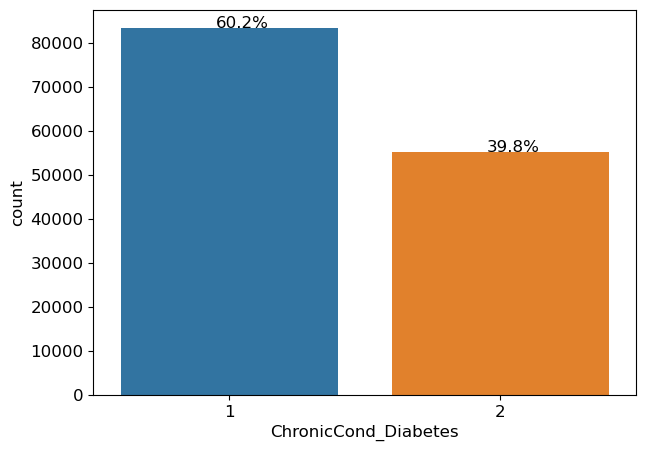

In [57]:
plt.figure(figsize=(7,5))
ax = sns.countplot('ChronicCond_Diabetes', data = train_bd)
plt.xticks(size = 12)
plt.xlabel('ChronicCond_Diabetes', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,train_bd.ChronicCond_Depression)

**ChronicCond_IschemicHeart**

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


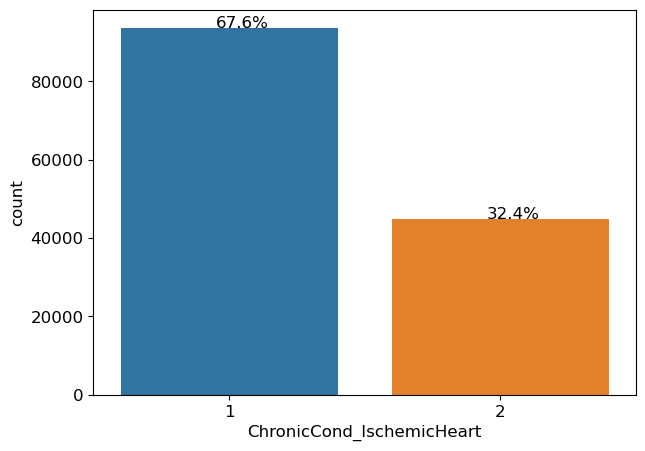

In [58]:
plt.figure(figsize=(7,5))
ax = sns.countplot('ChronicCond_IschemicHeart', data = train_bd)
plt.xticks(size = 12)
plt.xlabel('ChronicCond_IschemicHeart', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,train_bd.ChronicCond_IschemicHeart)

**ChronicCond_Osteoporasis**

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


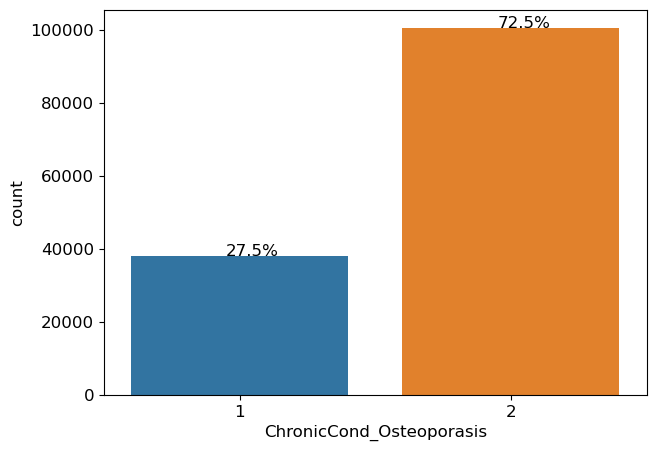

In [59]:
plt.figure(figsize=(7,5))
ax = sns.countplot('ChronicCond_Osteoporasis', data = train_bd)
plt.xticks(size = 12)
plt.xlabel('ChronicCond_Osteoporasis', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,train_bd.ChronicCond_Osteoporasis)

**ChronicCond_rheumatoidarthritis**

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


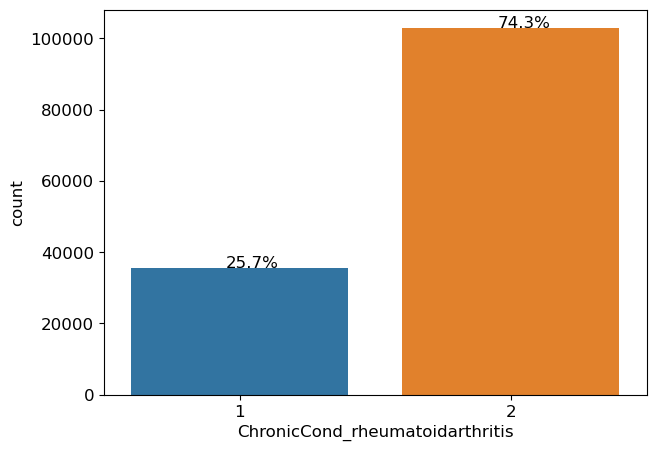

In [60]:
plt.figure(figsize=(7,5))
ax = sns.countplot('ChronicCond_rheumatoidarthritis', data = train_bd)
plt.xticks(size = 12)
plt.xlabel('ChronicCond_rheumatoidarthritis', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,train_bd.ChronicCond_rheumatoidarthritis)

**ChronicCond_stroke**

C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


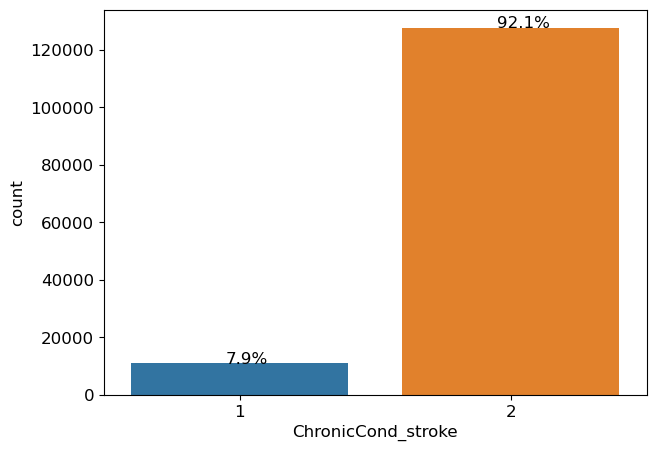

In [61]:
plt.figure(figsize=(7,5))
ax = sns.countplot('ChronicCond_stroke', data = train_bd)
plt.xticks(size = 12)
plt.xlabel('ChronicCond_stroke', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,train_bd.ChronicCond_stroke)

In [62]:
train_bd.isnull().sum()

BeneID                             0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
County                             0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
Age                                0
dtype: int64

In [63]:
train_bd.dtypes

BeneID                             object
Gender                              int64
Race                                int64
RenalDiseaseIndicator               int64
State                               int64
County                              int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt            int64
OPAnnualDeductibleAmt               int64
Age                                object
dtype: object

In [64]:
# Convert categorical variables to numerical using get_dummies
train_bd = pd.get_dummies(train_bd, columns=['Age'])

In [65]:
train_bd.isnull().sum()

BeneID                             0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
County                             0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
Age_Early Adulthood                0
Age_Early Middle Age               0
Age_Late Adulthood                 0
Age_Late Middle Age                0
dtype: int64

# Provider Data

In [66]:
train_td.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


C:\Users\Anusha GS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


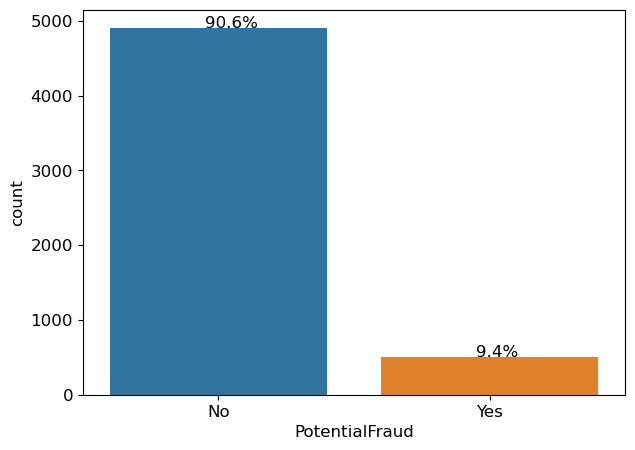

In [67]:
plt.figure(figsize=(7,5))
ax = sns.countplot('PotentialFraud', data = train_td)
plt.xticks(size = 12)
plt.xlabel('PotentialFraud', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,train_td.PotentialFraud)

In [68]:
df_fraud_prov = train_td[train_td.PotentialFraud == 'Yes']
df_fraud_prov.head()

,Provider,PotentialFraud
1,PRV51003,Yes
3,PRV51005,Yes
13,PRV51021,Yes
25,PRV51037,Yes
37,PRV51052,Yes


In [69]:
df_fraud_prov.shape

(506, 2)

In [70]:
train_td.isnull().sum()

Provider          0
PotentialFraud    0
dtype: int64

In [71]:
#converting categorical to numerical by replacing yes and no by 1 and 0
train_td['PotentialFraud'].replace(['Yes', 'No'],[1, 0], inplace=True)

In [72]:
train_td.head()

,Provider,PotentialFraud
0,PRV51001,0
1,PRV51003,1
2,PRV51004,0
3,PRV51005,1
4,PRV51007,0


In [73]:
train_td.dtypes

Provider          object
PotentialFraud     int64
dtype: object

In [74]:
train_td.shape

(5410, 2)

# Inpatient Data

In [75]:
train_id.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [76]:
train_id.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [77]:
train_id.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
AdmissionDt                object
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCo

In [78]:
train_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [79]:
train_id.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,40474.000000,39575.0,23148.000000,5454.000000,965.000000,116.000000,9.000000,0.0
mean,10087.884074,1068.0,5894.611759,4103.738174,4226.355440,4070.172414,5269.444444,NaN
std,10303.099402,0.0,3049.304400,2028.182156,2282.761581,1994.409802,2780.071632,NaN
min,0.000000,1068.0,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN
25%,4000.000000,1068.0,3848.000000,2724.000000,2724.000000,2758.750000,4139.000000,NaN
50%,7000.000000,1068.0,5369.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN
75%,12000.000000,1068.0,8666.250000,4439.000000,5185.000000,4439.000000,5185.000000,NaN
max,125000.000000,1068.0,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN


In [80]:
train_id.shape

(40474, 30)

In [81]:
train_id.isnull().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64

In [82]:
#Percentage of null values in each column
col_with_nullvalues=train_id.isnull().sum()/len(train_id)*100
col_with_nullvalues.sort_values(ascending=False)

ClmProcedureCode_6        100.000000
ClmProcedureCode_5         99.977764
ClmProcedureCode_4         99.713396
ClmProcedureCode_3         97.615753
ClmDiagnosisCode_10        90.297475
OtherPhysician             88.412314
ClmProcedureCode_2         86.524683
ClmProcedureCode_1         42.807728
OperatingPhysician         41.122696
ClmDiagnosisCode_9         33.347334
ClmDiagnosisCode_8         24.563918
ClmDiagnosisCode_7         17.932500
ClmDiagnosisCode_6         11.953353
ClmDiagnosisCode_5          7.150269
ClmDiagnosisCode_4          3.790087
DeductibleAmtPaid           2.221179
ClmDiagnosisCode_3          1.670208
ClmDiagnosisCode_2          0.558383
AttendingPhysician          0.276721
ClaimID                     0.000000
ClmDiagnosisCode_1          0.000000
DiagnosisGroupCode          0.000000
DischargeDt                 0.000000
ClmAdmitDiagnosisCode       0.000000
AdmissionDt                 0.000000
InscClaimAmtReimbursed      0.000000
Provider                    0.000000
C

In [83]:
#drop the columns with 30 % or more null values
col_with_nullvalues = list(col_with_nullvalues[col_with_nullvalues.values>=30.0].index)
train_id.drop(labels=col_with_nullvalues,axis=1,inplace=True)
print(len(col_with_nullvalues))

10


In [84]:
train_id.isnull().sum()

BeneID                       0
ClaimID                      0
ClaimStartDt                 0
ClaimEndDt                   0
Provider                     0
InscClaimAmtReimbursed       0
AttendingPhysician         112
AdmissionDt                  0
ClmAdmitDiagnosisCode        0
DeductibleAmtPaid          899
DischargeDt                  0
DiagnosisGroupCode           0
ClmDiagnosisCode_1           0
ClmDiagnosisCode_2         226
ClmDiagnosisCode_3         676
ClmDiagnosisCode_4        1534
ClmDiagnosisCode_5        2894
ClmDiagnosisCode_6        4838
ClmDiagnosisCode_7        7258
ClmDiagnosisCode_8        9942
dtype: int64

In [85]:
train_id.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
AdmissionDt                object
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
dtype: object

**AttendingPhysician**

In [86]:
#Replacing the missing value "?" with "nan" value
train_id['AttendingPhysician']=train_id['AttendingPhysician'].replace('?',np.nan)

In [87]:
#replacing the missing value by the "mode" method as it is a categorical feature
train_id['AttendingPhysician'].fillna(train_id['AttendingPhysician'].mode()[0], inplace=True)

In [88]:
train_id.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
AdmissionDt                object
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
dtype: object

**ClmDiagnosisCode_1**

In [89]:
# removing noise from ClmDiagnosisCode_1 column
train_id["ClmDiagnosisCode_1"] = train_id["ClmDiagnosisCode_1"].apply(lambda r: re.sub("[^0-9]","",r)) # taking only digits
train_id["ClmDiagnosisCode_1"] = train_id["ClmDiagnosisCode_1"].astype('int64') # changing object to int
train_id.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,2009-08-13,78321,1068.0,2009-08-30,975,42,3051,34400,5856,42732,486,5119,29620


**ClmDiagnosisCode_2**

In [90]:
#Replacing the missing value "?" with "nan" value
train_id['ClmDiagnosisCode_2']=train_id['ClmDiagnosisCode_2'].replace('?',np.nan)

In [91]:
#replacing the missing value by the "mode" method as it is a categorical feature
train_id['ClmDiagnosisCode_2'].fillna(train_id['ClmDiagnosisCode_2'].mode()[0], inplace=True)

In [92]:
# removing noise from ClmDiagnosisCode_2 column
train_id["ClmDiagnosisCode_2"] = train_id["ClmDiagnosisCode_2"].apply(lambda r: re.sub("[^0-9]","",r)) # taking only digits
train_id["ClmDiagnosisCode_2"] = train_id["ClmDiagnosisCode_2"].astype('int64') # changing object to int
train_id.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,2009-08-13,78321,1068.0,2009-08-30,975,42,3051,34400,5856,42732,486,5119,29620


**ClmDiagnosisCode_3**

In [93]:
#Replacing the missing value "?" with "nan" value
train_id['ClmDiagnosisCode_3']=train_id['ClmDiagnosisCode_3'].replace('?',np.nan)

In [94]:
#replacing the missing value by the "mode" method as it is a categorical feature
train_id['ClmDiagnosisCode_3'].fillna(train_id['ClmDiagnosisCode_3'].mode()[0], inplace=True)

In [95]:
# removing noise from ClmDiagnosisCode_3 column
train_id["ClmDiagnosisCode_3"] = train_id["ClmDiagnosisCode_3"].apply(lambda r: re.sub("[^0-9]","",r)) # taking only digits
train_id["ClmDiagnosisCode_3"] = train_id["ClmDiagnosisCode_3"].astype('int64') # changing object to int
train_id.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,2009-08-13,78321,1068.0,2009-08-30,975,42,3051,34400,5856,42732,486,5119,29620


**ClmDiagnosisCode_4**

In [96]:
#Replacing the missing value "?" with "nan" value
train_id['ClmDiagnosisCode_4']=train_id['ClmDiagnosisCode_4'].replace('?',np.nan)

In [97]:
#replacing the missing value by the "mode" method as it is a categorical feature
train_id['ClmDiagnosisCode_4'].fillna(train_id['ClmDiagnosisCode_4'].mode()[0], inplace=True)

In [98]:
# removing noise from ClmDiagnosisCode_4 column
train_id["ClmDiagnosisCode_4"] = train_id["ClmDiagnosisCode_4"].apply(lambda r: re.sub("[^0-9]","",r)) # taking only digits
train_id["ClmDiagnosisCode_4"] = train_id["ClmDiagnosisCode_4"].astype('int64') # changing object to int
train_id.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,4019,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,2009-08-13,78321,1068.0,2009-08-30,975,42,3051,34400,5856,42732,486,5119,29620


**ClmDiagnosisCode_5**

In [99]:
#Replacing the missing value "?" with "nan" value
train_id['ClmDiagnosisCode_5']=train_id['ClmDiagnosisCode_5'].replace('?',np.nan)

In [100]:
#replacing the missing value by the "mode" method as it is a categorical feature
train_id['ClmDiagnosisCode_5'].fillna(train_id['ClmDiagnosisCode_5'].mode()[0], inplace=True)

In [101]:
# removing noise from ClmDiagnosisCode_5 column
train_id["ClmDiagnosisCode_5"] = train_id["ClmDiagnosisCode_5"].apply(lambda r: re.sub("[^0-9]","",r)) # taking only digits
train_id["ClmDiagnosisCode_5"] = train_id["ClmDiagnosisCode_5"].astype('int64') # changing object to int
train_id.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,4019,4019,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,1581,32723,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,1041,4254,25062,40390
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,2009-08-13,78321,1068.0,2009-08-30,975,42,3051,34400,5856,42732,486,5119,29620


**ClmDiagnosisCode_6**

In [102]:
#Replacing the missing value "?" with "nan" value
train_id['ClmDiagnosisCode_6']=train_id['ClmDiagnosisCode_6'].replace('?',np.nan)

In [103]:
#replacing the missing value by the "mode" method as it is a categorical feature
train_id['ClmDiagnosisCode_6'].fillna(train_id['ClmDiagnosisCode_6'].mode()[0], inplace=True)

In [104]:
# removing noise from ClmDiagnosisCode_6 column
train_id["ClmDiagnosisCode_6"] = train_id["ClmDiagnosisCode_6"].apply(lambda r: re.sub("[^0-9]","",r)) # taking only digits
train_id["ClmDiagnosisCode_6"] = train_id["ClmDiagnosisCode_6"].astype('int64') # changing object to int
train_id.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,4019,4019,4019,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,1581,32723,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,1041,4254,25062,40390
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,2009-08-13,78321,1068.0,2009-08-30,975,42,3051,34400,5856,42732,486,5119,29620


**ClmDiagnosisCode_7**

In [105]:
#Replacing the missing value "?" with "nan" value
train_id['ClmDiagnosisCode_7']=train_id['ClmDiagnosisCode_7'].replace('?',np.nan)

In [106]:
#replacing the missing value by the "mode" method as it is a categorical feature
train_id['ClmDiagnosisCode_7'].fillna(train_id['ClmDiagnosisCode_7'].mode()[0], inplace=True)

In [107]:
# removing noise from ClmDiagnosisCode_7 column
train_id["ClmDiagnosisCode_7"] = train_id["ClmDiagnosisCode_7"].apply(lambda r: re.sub("[^0-9]","",r)) # taking only digits
train_id["ClmDiagnosisCode_7"] = train_id["ClmDiagnosisCode_7"].astype('int64') # changing object to int
train_id.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,4019,4019,4019,4019,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,1581,32723,4019,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,1041,4254,25062,40390
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,2009-08-13,78321,1068.0,2009-08-30,975,42,3051,34400,5856,42732,486,5119,29620


**ClmDiagnosisCode_8**

In [108]:
#Replacing the missing value "?" with "nan" value
train_id['ClmDiagnosisCode_8']=train_id['ClmDiagnosisCode_8'].replace('?',np.nan)

In [109]:
#replacing the missing value by the "mode" method as it is a categorical feature
train_id['ClmDiagnosisCode_8'].fillna(train_id['ClmDiagnosisCode_8'].mode()[0], inplace=True)

In [110]:
# removing noise from ClmDiagnosisCode_8 column
train_id["ClmDiagnosisCode_8"] = train_id["ClmDiagnosisCode_8"].apply(lambda r: re.sub("[^0-9]","",r)) # taking only digits
train_id["ClmDiagnosisCode_8"] = train_id["ClmDiagnosisCode_8"].astype('int64') # changing object to int
train_id.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,4019,4019,4019,4019,4019
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,1581,32723,4019,4019
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,1041,4254,25062,40390
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,2009-08-13,78321,1068.0,2009-08-30,975,42,3051,34400,5856,42732,486,5119,29620


**DeductibleAmtPaid**

In [111]:
#has only single unique value
train_id = train_id.drop('DeductibleAmtPaid', axis=1)

In [112]:
train_id.shape

(40474, 19)

In [113]:
train_id.dtypes

BeneID                    object
ClaimID                   object
ClaimStartDt              object
ClaimEndDt                object
Provider                  object
InscClaimAmtReimbursed     int64
AttendingPhysician        object
AdmissionDt               object
ClmAdmitDiagnosisCode     object
DischargeDt               object
DiagnosisGroupCode        object
ClmDiagnosisCode_1         int64
ClmDiagnosisCode_2         int64
ClmDiagnosisCode_3         int64
ClmDiagnosisCode_4         int64
ClmDiagnosisCode_5         int64
ClmDiagnosisCode_6         int64
ClmDiagnosisCode_7         int64
ClmDiagnosisCode_8         int64
dtype: object

In [114]:
train_id['BeneID'].value_counts()

BENE134170    8
BENE64791     7
BENE121796    7
BENE117116    7
BENE119457    7
             ..
BENE67673     1
BENE67658     1
BENE67655     1
BENE67653     1
BENE159188    1
Name: BeneID, Length: 31289, dtype: int64

**Adding Claim Duration**

In [115]:
train_id['ClaimEndDt'] = pd.to_datetime(train_id['ClaimEndDt'], format='%Y-%m-%d')
train_id['ClaimStartDt'] = pd.to_datetime(train_id['ClaimStartDt'], format='%Y-%m-%d')

This converts the **timedelta object** to a **numeric value** in days using the .days attribute of the timedelta object.

In [116]:
train_id["claim_duration"] = (train_id['ClaimEndDt'] - train_id['ClaimStartDt']).dt.days
train_id.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,claim_duration
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,2009-04-12,7866,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,6
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,2009-08-31,6186,2009-09-02,750,6186,2948,56400,4019,4019,4019,4019,4019,2
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,2009-09-17,29590,2009-09-20,883,29623,30390,71690,34590,1581,32723,4019,4019,3
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,2009-02-14,431,2009-02-22,067,43491,2762,7843,32723,1041,4254,25062,40390,8
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,2009-08-13,78321,2009-08-30,975,42,3051,34400,5856,42732,486,5119,29620,17


In [117]:
train_id = train_id.drop('ClaimEndDt', axis=1)

In [118]:
train_id = train_id.drop('ClaimStartDt', axis=1)

In [119]:
train_id.shape

(40474, 18)

In [120]:
train_id.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,claim_duration
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,2009-04-12,7866,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,6
1,BENE11001,CLM66048,PRV55907,5000,PHY318495,2009-08-31,6186,2009-09-02,750,6186,2948,56400,4019,4019,4019,4019,4019,2
2,BENE11001,CLM68358,PRV56046,5000,PHY372395,2009-09-17,29590,2009-09-20,883,29623,30390,71690,34590,1581,32723,4019,4019,3
3,BENE11011,CLM38412,PRV52405,5000,PHY369659,2009-02-14,431,2009-02-22,067,43491,2762,7843,32723,1041,4254,25062,40390,8
4,BENE11014,CLM63689,PRV56614,10000,PHY379376,2009-08-13,78321,2009-08-30,975,42,3051,34400,5856,42732,486,5119,29620,17


In [121]:
train_id['AdmissionDt'] = pd.to_datetime(train_id['AdmissionDt'], format='%Y-%m-%d')
train_id['DischargeDt'] = pd.to_datetime(train_id['DischargeDt'], format='%Y-%m-%d')

In [122]:
train_id["Patient_in_the_hospital"] = (train_id['DischargeDt'] - train_id['AdmissionDt']).dt.days
train_id.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,claim_duration,Patient_in_the_hospital
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,2009-04-12,7866,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,6,6
1,BENE11001,CLM66048,PRV55907,5000,PHY318495,2009-08-31,6186,2009-09-02,750,6186,2948,56400,4019,4019,4019,4019,4019,2,2
2,BENE11001,CLM68358,PRV56046,5000,PHY372395,2009-09-17,29590,2009-09-20,883,29623,30390,71690,34590,1581,32723,4019,4019,3,3
3,BENE11011,CLM38412,PRV52405,5000,PHY369659,2009-02-14,431,2009-02-22,067,43491,2762,7843,32723,1041,4254,25062,40390,8,8
4,BENE11014,CLM63689,PRV56614,10000,PHY379376,2009-08-13,78321,2009-08-30,975,42,3051,34400,5856,42732,486,5119,29620,17,17


In [123]:
train_id = train_id.drop('AdmissionDt', axis=1)

In [124]:
train_id = train_id.drop('DischargeDt', axis=1)

In [125]:
train_id.dtypes

BeneID                     object
ClaimID                    object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
ClmAdmitDiagnosisCode      object
DiagnosisGroupCode         object
ClmDiagnosisCode_1          int64
ClmDiagnosisCode_2          int64
ClmDiagnosisCode_3          int64
ClmDiagnosisCode_4          int64
ClmDiagnosisCode_5          int64
ClmDiagnosisCode_6          int64
ClmDiagnosisCode_7          int64
ClmDiagnosisCode_8          int64
claim_duration              int64
Patient_in_the_hospital     int64
dtype: object

In [126]:
# removing noise from price column
train_id["ClmAdmitDiagnosisCode"] = train_id["ClmAdmitDiagnosisCode"].apply(lambda r: re.sub("[^0-9]","",r)) # taking only digits
train_id["ClmAdmitDiagnosisCode"] = train_id["ClmAdmitDiagnosisCode"].astype('int64') # changing object to int
train_id.head(5)

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,ClmAdmitDiagnosisCode,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,claim_duration,Patient_in_the_hospital
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,7866,201,1970,4019,5853,7843,2768,71590,2724,19889,6,6
1,BENE11001,CLM66048,PRV55907,5000,PHY318495,6186,750,6186,2948,56400,4019,4019,4019,4019,4019,2,2
2,BENE11001,CLM68358,PRV56046,5000,PHY372395,29590,883,29623,30390,71690,34590,1581,32723,4019,4019,3,3
3,BENE11011,CLM38412,PRV52405,5000,PHY369659,431,067,43491,2762,7843,32723,1041,4254,25062,40390,8,8
4,BENE11014,CLM63689,PRV56614,10000,PHY379376,78321,975,42,3051,34400,5856,42732,486,5119,29620,17,17


In [127]:
#converting categorical to numerical by replacing yes and no by 1 and 0
train_id['DiagnosisGroupCode'].replace('OTH', 0, inplace=True)

In [128]:
train_id["DiagnosisGroupCode"] = train_id["DiagnosisGroupCode"].astype('int64') # changing object to int

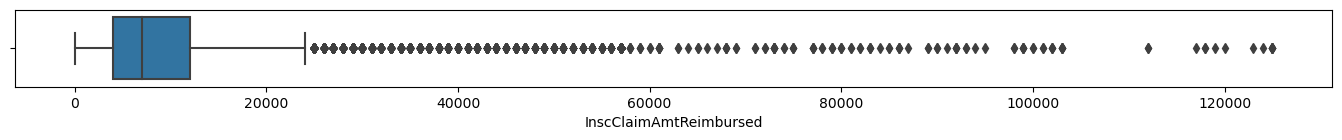

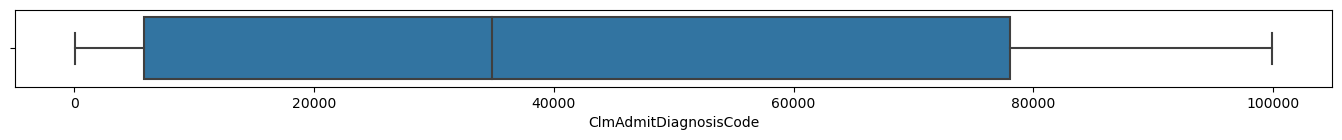

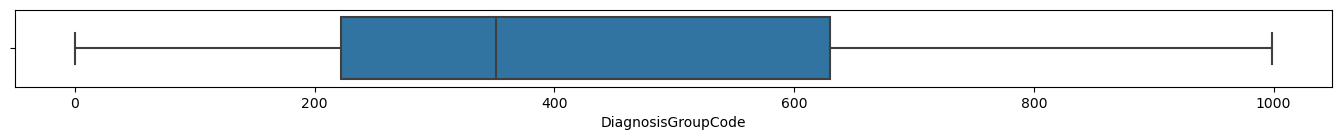

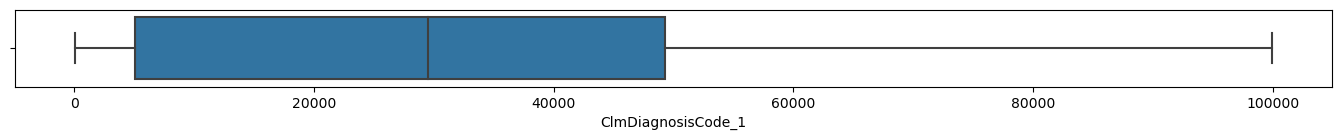

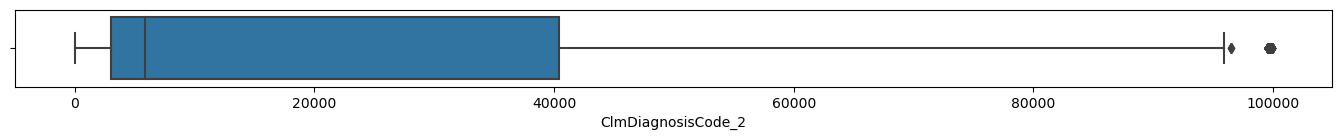

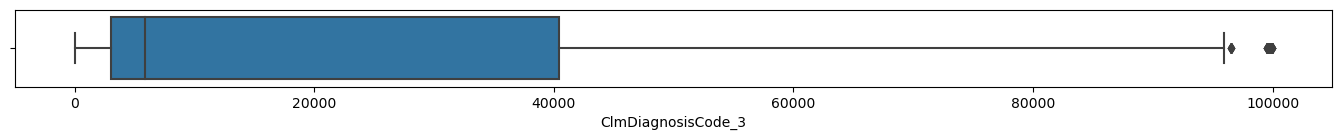

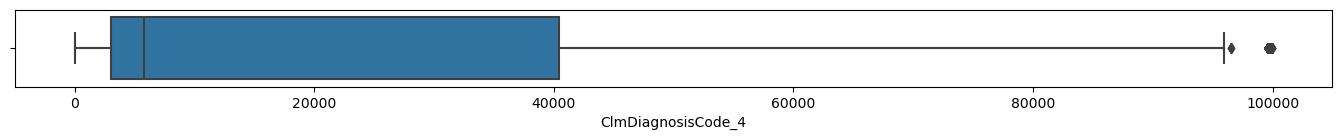

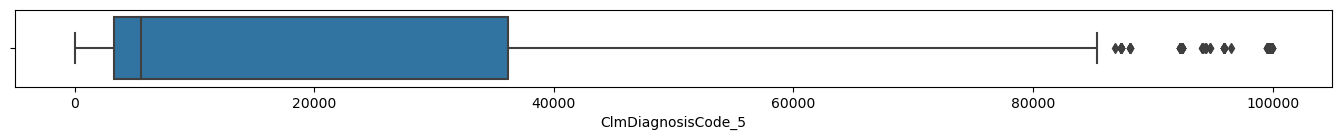

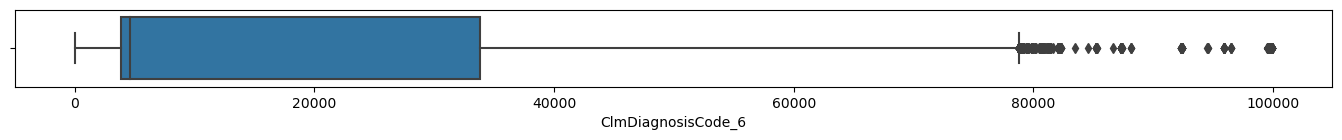

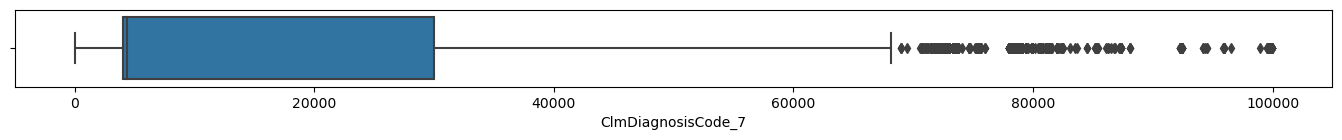

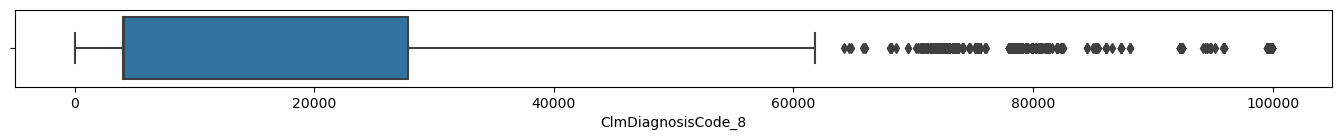

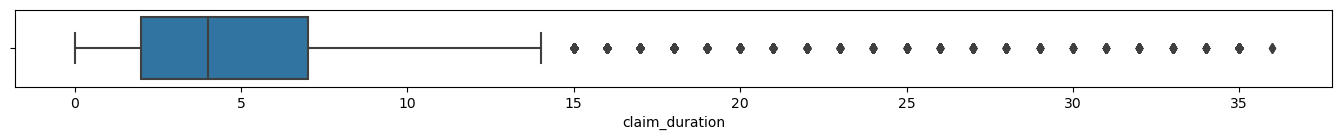

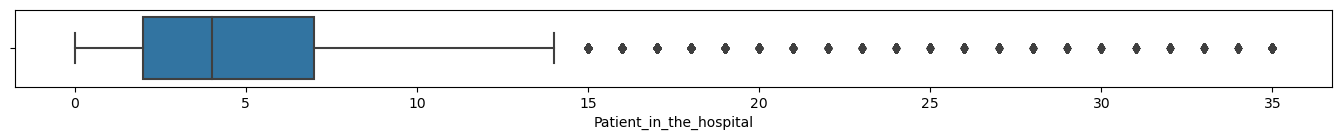

In [129]:
df_id=train_id.select_dtypes(include = [np.number])
for column in df_id:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df_id, x=column)

In [130]:
#to know the number of numerical and categorical features
num_data1 = train_id.select_dtypes(exclude='object')
cat_data1 = train_id.select_dtypes(include='object')

In [131]:
for col in num_data1:

    q1=np.percentile(num_data1[col],25) 
    q3=np.percentile(num_data1[col],75)

    IQR=q3-q1
    
    print('Outliers for :',col,'\n')
  
    upper=q3+1.5*IQR

    lower=q1-1.5*IQR
   
    outliers=[]
    
    for i in num_data1[col]:
        if(i<lower or i>upper):
            outliers.append(i)
    print("Outliers are:",outliers)
    print("\n")

Outliers for : InscClaimAmtReimbursed 

Outliers are: [26000, 29000, 102000, 30000, 47000, 31000, 26000, 48000, 33000, 29000, 26000, 30000, 54000, 25000, 25000, 47000, 34000, 31000, 35000, 29000, 51000, 35000, 34000, 27000, 31000, 32000, 57000, 44000, 41000, 45000, 27000, 30000, 36000, 47000, 26000, 45000, 33000, 25000, 46000, 57000, 25000, 28000, 45000, 33000, 57000, 28000, 54000, 33000, 57000, 57000, 27000, 27000, 30000, 125000, 28000, 42000, 32000, 47000, 34000, 27000, 39000, 57000, 32000, 57000, 41000, 44000, 28000, 39000, 124000, 37000, 26000, 37000, 48000, 25000, 33000, 25000, 30000, 25000, 36000, 33000, 54000, 33000, 57000, 36000, 54000, 57000, 26000, 49000, 35000, 31000, 33000, 34000, 32000, 34000, 57000, 28000, 25000, 46000, 57000, 28000, 25000, 29000, 54000, 25000, 33000, 31000, 36000, 30000, 43000, 57000, 52000, 42000, 36000, 43000, 56000, 51000, 25000, 27000, 38000, 25000, 25000, 39000, 45000, 45000, 29000, 37000, 29000, 57000, 26000, 25000, 37000, 31000, 33000, 57000, 3300

Outliers for : ClmDiagnosisCode_3 

Outliers are: [99731, 99591, 99529, 99664, 96509, 99811, 99529, 99859, 99682, 99591, 99592, 99592, 99591, 99591, 99812, 99592, 99592, 99674, 99520, 99592, 99591, 99672, 99859, 99591, 99812, 99673, 99592, 99592, 99591, 99591, 99731, 99664, 99591, 99812, 99739, 99591, 99672, 99591, 99859, 99644, 99591, 99739, 99791, 99673, 99592, 99591, 99591, 99591, 99811, 99676, 99666, 99591, 99591, 99592, 99662, 99592, 99591, 99592, 99666, 99830, 99529, 99591, 99591, 99591, 99811, 99679, 99811, 99673, 99811, 99592, 99591, 99674, 99592, 99831, 99739, 99681, 99702, 99664, 99591, 99592, 99591, 99591, 99592, 99592, 99702, 99664, 99769, 99591, 99592, 99591, 99812, 99661, 99592, 99592, 99859, 99883, 99672, 99593, 99664, 99591, 99931, 99591, 99591, 99592, 99591, 99591, 99591, 99593, 99591, 99889, 99859, 99811, 99859, 99591, 99592, 99661, 99830, 99674, 99592, 99591, 99591, 99592, 99591, 99591, 99591, 99592, 99591, 99646, 99811, 99592, 99591, 99592, 99931, 99859, 99591, 9973

Outliers are: [71590, 78605, 79092, 80709, 70715, 99592, 99592, 78552, 99832, 73300, 71945, 78959, 78609, 73300, 78057, 79092, 75310, 78720, 70722, 78899, 71589, 73300, 78900, 71590, 78097, 99859, 78959, 72700, 78552, 73300, 78552, 73007, 80701, 79902, 73300, 78701, 71837, 99664, 70723, 73679, 70705, 78057, 72190, 99592, 79902, 99681, 85401, 78552, 99591, 78702, 79902, 70719, 78552, 78720, 70707, 72989, 78079, 72252, 73300, 71590, 73300, 78841, 99811, 70719, 72190, 70719, 99592, 73313, 99811, 78830, 71590, 99592, 70715, 71941, 70715, 78039, 73025, 70707, 78650, 72190, 72888, 78720, 71590, 99592, 71690, 70703, 71590, 78079, 78650, 72989, 73017, 78609, 78791, 78650, 71590, 78829, 70710, 71690, 71906, 71591, 71590, 70707, 70721, 73025, 78079, 71536, 99811, 71590, 78701, 73710, 70714, 78830, 78321, 78720, 71536, 73300, 78551, 99673, 78491, 73390, 71695, 99592, 78650, 78009, 70715, 78720, 78079, 75612, 71690, 99679, 70707, 71590, 99592, 78057, 72400, 70703, 99592, 78791, 78096, 70720, 71590

In [132]:
#treating outliers
for col in num_data1:
    tenth_percentile=np.percentile(num_data1[col],10)
    ninetieth_percentile=np.percentile(num_data1[col],90)
    print(tenth_percentile,ninetieth_percentile)
    num_data1[col]=np.where(num_data1[col]<tenth_percentile,tenth_percentile,num_data1[col]) 
    num_data1[col]=np.where(num_data1[col]>ninetieth_percentile,ninetieth_percentile,num_data1[col])

3000.0 20000.0
2767.0 78701.0
165.0 871.0
1623.0 75311.40000000001
1582.0 59389.0
1582.0 58881.0
1582.0 57450.700000000004
1582.0 56722.0
1889.0 56039.0
2449.0 53085.0
2449.0 53081.0
1.0 12.0
1.0 12.0


C:\Users\Anusha GS\AppData\Local\Temp\ipykernel_16124\1401514723.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data1[col]=np.where(num_data1[col]<tenth_percentile,tenth_percentile,num_data1[col])
C:\Users\Anusha GS\AppData\Local\Temp\ipykernel_16124\1401514723.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data1[col]=np.where(num_data1[col]>ninetieth_percentile,ninetieth_percentile,num_data1[col])


In [133]:
train_id.dtypes

BeneID                     object
ClaimID                    object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
ClmAdmitDiagnosisCode       int64
DiagnosisGroupCode          int64
ClmDiagnosisCode_1          int64
ClmDiagnosisCode_2          int64
ClmDiagnosisCode_3          int64
ClmDiagnosisCode_4          int64
ClmDiagnosisCode_5          int64
ClmDiagnosisCode_6          int64
ClmDiagnosisCode_7          int64
ClmDiagnosisCode_8          int64
claim_duration              int64
Patient_in_the_hospital     int64
dtype: object

# Outpatient Data

In [134]:
train_od.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [135]:
train_od.shape

(517737, 27)

In [136]:
train_od.describe()

,InscClaimAmtReimbursed,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid
count,517737.000000,162.000000,36.000000,4.000000,2.000000,0.0,0.0,517737.000000
mean,286.334799,6116.611111,4503.277778,2959.000000,4075.500000,NaN,NaN,2.779233
std,694.034343,3217.719258,2504.015000,1863.455393,5323.806956,NaN,NaN,15.785839
min,0.000000,51.000000,412.000000,412.000000,311.000000,NaN,NaN,0.000000
25%,40.000000,3893.000000,2724.000000,2146.000000,2193.250000,NaN,NaN,0.000000
50%,80.000000,5244.500000,4019.000000,3511.500000,4075.500000,NaN,NaN,0.000000
75%,200.000000,9421.500000,5849.000000,4324.500000,5957.750000,NaN,NaN,0.000000
max,102500.000000,9999.000000,9982.000000,4401.000000,7840.000000,NaN,NaN,897.000000


In [137]:
train_od.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCode_6        float64
DeductibleAmtPaid           int64
ClmAdmitDiagnosisCode      object
dtype: object

In [138]:
train_od.isnull().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64

In [139]:
train_od.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [140]:
#Percentage of null values in each column
col_with_nullvalues=train_od.isnull().sum()/len(train_od)*100
col_with_nullvalues.sort_values(ascending=False)

ClmProcedureCode_6        100.000000
ClmProcedureCode_5        100.000000
ClmProcedureCode_4         99.999614
ClmProcedureCode_3         99.999227
ClmProcedureCode_2         99.993047
ClmProcedureCode_1         99.968710
ClmDiagnosisCode_10        99.790820
ClmDiagnosisCode_9         97.134066
ClmDiagnosisCode_8         95.574587
ClmDiagnosisCode_7         93.633640
ClmDiagnosisCode_6         90.582864
ClmDiagnosisCode_5         85.640586
OperatingPhysician         82.497484
ClmAdmitDiagnosisCode      79.637345
ClmDiagnosisCode_4         75.741351
OtherPhysician             62.327205
ClmDiagnosisCode_3         60.741264
ClmDiagnosisCode_2         37.737307
ClmDiagnosisCode_1          2.018979
AttendingPhysician          0.269635
ClaimID                     0.000000
InscClaimAmtReimbursed      0.000000
Provider                    0.000000
ClaimEndDt                  0.000000
ClaimStartDt                0.000000
DeductibleAmtPaid           0.000000
BeneID                      0.000000
d

In [141]:
#drop the columns with 30 % or more null values
col_with_nullvalues = list(col_with_nullvalues[col_with_nullvalues.values>=30.0].index)
train_od.drop(labels=col_with_nullvalues,axis=1,inplace=True)
print(len(col_with_nullvalues)) 

18


In [142]:
train_od.isnull().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician         1396
ClmDiagnosisCode_1        10453
DeductibleAmtPaid             0
dtype: int64

In [143]:
train_od['BeneID'].value_counts()

BENE42721     29
BENE118316    29
BENE143400    27
BENE63544     27
BENE63504     27
              ..
BENE89590      1
BENE89592      1
BENE89594      1
BENE89595      1
BENE85121      1
Name: BeneID, Length: 133980, dtype: int64

In [144]:
train_od.dtypes

BeneID                    object
ClaimID                   object
ClaimStartDt              object
ClaimEndDt                object
Provider                  object
InscClaimAmtReimbursed     int64
AttendingPhysician        object
ClmDiagnosisCode_1        object
DeductibleAmtPaid          int64
dtype: object

**AttendingPhysician**

In [145]:
#Replacing the missing value "?" with "nan" value
train_od['AttendingPhysician']=train_od['AttendingPhysician'].replace('?',np.nan)

In [146]:
#replacing the missing value by the "mode" method as it is a categorical feature
train_od['AttendingPhysician'].fillna(train_od['AttendingPhysician'].mode()[0], inplace=True)

**ClmDiagnosisCode_1**

In [147]:
#Replacing the missing value "?" with "nan" value
train_od['ClmDiagnosisCode_1']=train_od['ClmDiagnosisCode_1'].replace('?',np.nan)

In [148]:
#replacing the missing value by the "mode" method as it is a categorical feature
train_od['ClmDiagnosisCode_1'].fillna(train_od['ClmDiagnosisCode_1'].mode()[0], inplace=True)

In [149]:
# removing noise from price column
train_od["ClmDiagnosisCode_1"] = train_od["ClmDiagnosisCode_1"].apply(lambda r: re.sub("[^0-9]","",r)) # taking only digits
train_od["ClmDiagnosisCode_1"] = train_od["ClmDiagnosisCode_1"].astype('int64') # changing object to int
train_id.head(5)

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,ClmAdmitDiagnosisCode,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,claim_duration,Patient_in_the_hospital
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,7866,201,1970,4019,5853,7843,2768,71590,2724,19889,6,6
1,BENE11001,CLM66048,PRV55907,5000,PHY318495,6186,750,6186,2948,56400,4019,4019,4019,4019,4019,2,2
2,BENE11001,CLM68358,PRV56046,5000,PHY372395,29590,883,29623,30390,71690,34590,1581,32723,4019,4019,3,3
3,BENE11011,CLM38412,PRV52405,5000,PHY369659,431,67,43491,2762,7843,32723,1041,4254,25062,40390,8,8
4,BENE11014,CLM63689,PRV56614,10000,PHY379376,78321,975,42,3051,34400,5856,42732,486,5119,29620,17,17


In [150]:
train_od.isnull().sum()

BeneID                    0
ClaimID                   0
ClaimStartDt              0
ClaimEndDt                0
Provider                  0
InscClaimAmtReimbursed    0
AttendingPhysician        0
ClmDiagnosisCode_1        0
DeductibleAmtPaid         0
dtype: int64

In [151]:
train_od.dtypes

BeneID                    object
ClaimID                   object
ClaimStartDt              object
ClaimEndDt                object
Provider                  object
InscClaimAmtReimbursed     int64
AttendingPhysician        object
ClmDiagnosisCode_1         int64
DeductibleAmtPaid          int64
dtype: object

**Adding Claim Duration**

In [152]:
train_od['ClaimEndDt'] = pd.to_datetime(train_od['ClaimEndDt'], format='%Y-%m-%d') #conversion
train_od['ClaimStartDt'] = pd.to_datetime(train_od['ClaimStartDt'], format='%Y-%m-%d')

In [153]:
train_od["claim_duration"] = (train_od['ClaimEndDt'] - train_od['ClaimStartDt']).dt.days #returns the number of days
train_od.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,ClmDiagnosisCode_1,DeductibleAmtPaid,claim_duration
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,78943,0,0
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,6115,0,0
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,2723,0,0
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,71988,0,0
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,82382,0,0


In [154]:
train_od = train_od.drop('ClaimEndDt', axis=1)

In [155]:
train_od = train_od.drop('ClaimStartDt', axis=1)

In [156]:
train_od.dtypes

BeneID                    object
ClaimID                   object
Provider                  object
InscClaimAmtReimbursed     int64
AttendingPhysician        object
ClmDiagnosisCode_1         int64
DeductibleAmtPaid          int64
claim_duration             int64
dtype: object

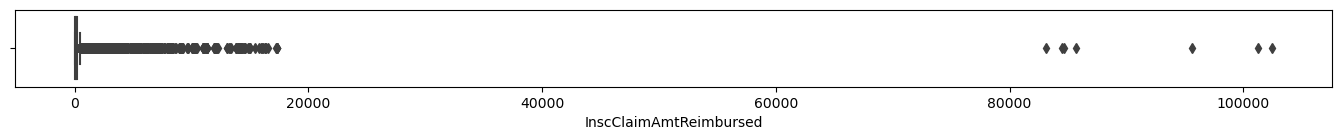

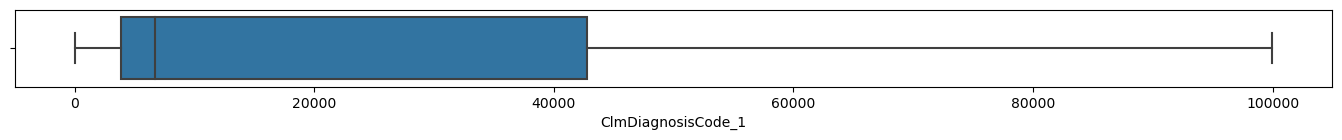

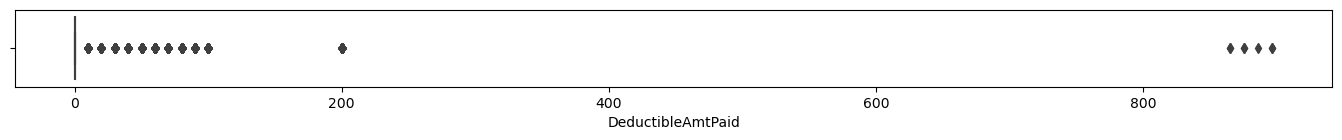

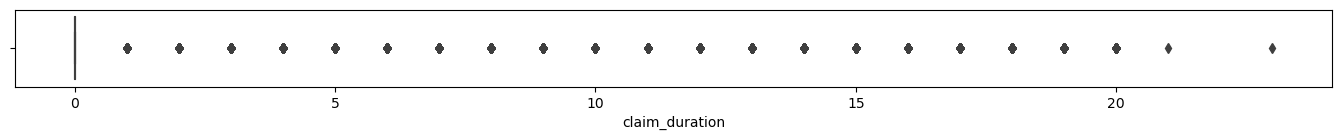

In [157]:
df_od = train_od.select_dtypes(include = [np.number])
for column in df_od:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df_od, x=column)

In [158]:
#to know the number of numerical and categorical features
num_data2 = train_od.select_dtypes(exclude='object')
cat_data2 = train_od.select_dtypes(include='object')

In [159]:
for col in num_data2:

    q1=np.percentile(num_data2[col],25) 
    q3=np.percentile(num_data2[col],75)

    IQR=q3-q1
    
    print('Outliers for :',col,'\n')
  
    upper=q3+1.5*IQR

    lower=q1-1.5*IQR
   
    outliers=[]
    
    for i in num_data2[col]:
        if(i<lower or i>upper):
            outliers.append(i)
    print("Outliers are:",outliers)
    print("\n")

Outliers for : InscClaimAmtReimbursed 

Outliers are: [500, 1300, 500, 1100, 900, 600, 800, 800, 2200, 800, 1800, 2500, 3300, 2000, 900, 1100, 500, 700, 500, 1000, 500, 3300, 600, 500, 700, 1000, 900, 700, 800, 1200, 700, 3200, 800, 800, 3300, 800, 600, 800, 600, 500, 900, 1800, 2100, 1900, 1900, 2000, 2700, 2500, 500, 2800, 1200, 500, 600, 600, 2200, 500, 600, 700, 800, 500, 2100, 1900, 2700, 2500, 2300, 600, 900, 3300, 600, 1800, 2100, 1600, 2100, 3300, 3300, 3200, 700, 800, 1500, 800, 3000, 600, 3300, 600, 800, 3100, 2000, 2500, 1000, 2500, 1600, 3300, 600, 800, 3000, 800, 1000, 700, 700, 700, 1000, 600, 1000, 2200, 800, 500, 700, 500, 500, 800, 2000, 1900, 3300, 900, 1000, 1100, 600, 500, 700, 500, 1000, 500, 9020, 2700, 600, 600, 500, 600, 600, 960, 2000, 1900, 800, 600, 1800, 800, 2700, 1700, 600, 800, 500, 1500, 1200, 2500, 1500, 1900, 2900, 1100, 600, 800, 500, 8060, 500, 600, 700, 500, 500, 700, 3300, 2400, 2100, 2400, 1800, 500, 1700, 2700, 1900, 800, 900, 700, 500, 900, 900,

Outliers are: []


Outliers for : DeductibleAmtPaid 

Outliers are: [200, 50, 200, 70, 90, 100, 40, 100, 70, 100, 100, 100, 30, 50, 50, 40, 100, 80, 90, 200, 20, 40, 40, 100, 40, 30, 40, 20, 40, 30, 100, 50, 80, 80, 50, 90, 40, 100, 80, 60, 70, 30, 100, 100, 10, 90, 100, 70, 90, 30, 50, 90, 30, 200, 70, 90, 100, 100, 40, 30, 30, 90, 40, 40, 10, 60, 90, 80, 10, 60, 70, 80, 100, 30, 40, 40, 20, 60, 100, 70, 70, 50, 20, 80, 60, 90, 70, 70, 100, 90, 30, 80, 60, 20, 60, 10, 30, 10, 90, 80, 100, 60, 80, 100, 40, 90, 20, 20, 200, 70, 100, 100, 100, 30, 20, 10, 70, 40, 40, 60, 60, 200, 70, 50, 40, 40, 40, 100, 10, 100, 100, 40, 70, 100, 50, 20, 60, 60, 100, 60, 20, 50, 40, 10, 100, 100, 80, 10, 90, 100, 80, 10, 60, 40, 30, 20, 60, 60, 70, 40, 100, 200, 20, 100, 100, 60, 90, 100, 100, 40, 100, 10, 10, 200, 80, 80, 30, 100, 70, 50, 60, 50, 20, 90, 40, 20, 50, 200, 20, 70, 100, 10, 70, 200, 80, 100, 40, 100, 10, 100, 100, 70, 10, 10, 20, 10, 100, 80, 80, 50, 80, 80, 40, 100, 100, 40, 60, 40, 100,

Outliers are: [20, 12, 20, 7, 20, 14, 20, 20, 1, 1, 20, 20, 1, 1, 15, 3, 1, 7, 20, 20, 20, 3, 20, 20, 6, 20, 2, 20, 14, 1, 20, 1, 20, 13, 5, 1, 3, 6, 1, 1, 20, 20, 9, 1, 18, 20, 20, 20, 20, 5, 20, 7, 10, 1, 1, 19, 20, 20, 20, 14, 20, 1, 14, 2, 2, 20, 20, 20, 20, 20, 16, 20, 4, 20, 7, 18, 20, 20, 3, 20, 13, 20, 5, 7, 4, 8, 20, 7, 7, 20, 17, 20, 20, 20, 4, 1, 14, 17, 8, 1, 2, 2, 19, 7, 9, 18, 1, 6, 3, 1, 8, 20, 20, 3, 1, 2, 20, 5, 11, 19, 14, 12, 1, 20, 18, 20, 20, 9, 2, 20, 17, 20, 20, 20, 20, 20, 1, 20, 20, 20, 20, 20, 20, 20, 1, 20, 4, 20, 20, 11, 20, 20, 20, 20, 20, 20, 20, 7, 2, 14, 6, 1, 20, 20, 1, 1, 9, 1, 5, 1, 5, 7, 15, 20, 3, 6, 2, 7, 2, 8, 16, 20, 7, 1, 5, 1, 20, 7, 18, 20, 20, 20, 3, 3, 1, 1, 20, 20, 20, 20, 1, 1, 8, 20, 20, 1, 4, 20, 4, 20, 1, 1, 20, 1, 12, 14, 20, 20, 18, 20, 20, 20, 1, 2, 8, 3, 1, 2, 8, 1, 20, 13, 1, 4, 20, 4, 7, 16, 2, 17, 20, 12, 20, 14, 20, 1, 5, 18, 1, 17, 14, 20, 15, 20, 2, 18, 3, 20, 20, 1, 1, 1, 1, 13, 7, 1, 2, 20, 1, 20, 20, 20, 14, 3, 11, 7, 1, 20

In [160]:
#treating outliers
for col in num_data2:
    tenth_percentile=np.percentile(num_data2[col],10)
    ninetieth_percentile=np.percentile(num_data2[col],90)
    print(tenth_percentile,ninetieth_percentile)
    num_data2[col]=np.where(num_data2[col]<tenth_percentile,tenth_percentile,num_data2[col]) 
    num_data2[col]=np.where(num_data2[col]>ninetieth_percentile,ninetieth_percentile,num_data2[col])

10.0 700.0
801.0 72884.0
0.0 0.0
0.0 2.0


C:\Users\Anusha GS\AppData\Local\Temp\ipykernel_16124\1478461711.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data2[col]=np.where(num_data2[col]<tenth_percentile,tenth_percentile,num_data2[col])
C:\Users\Anusha GS\AppData\Local\Temp\ipykernel_16124\1478461711.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data2[col]=np.where(num_data2[col]>ninetieth_percentile,ninetieth_percentile,num_data2[col])


In [161]:
train_od.dtypes

BeneID                    object
ClaimID                   object
Provider                  object
InscClaimAmtReimbursed     int64
AttendingPhysician        object
ClmDiagnosisCode_1         int64
DeductibleAmtPaid          int64
claim_duration             int64
dtype: object

In [162]:
train_od.dtypes

BeneID                    object
ClaimID                   object
Provider                  object
InscClaimAmtReimbursed     int64
AttendingPhysician        object
ClmDiagnosisCode_1         int64
DeductibleAmtPaid          int64
claim_duration             int64
dtype: object

In [163]:
train_od.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,ClmDiagnosisCode_1,DeductibleAmtPaid,claim_duration
0,BENE11002,CLM624349,PRV56011,30,PHY326117,78943,0,0
1,BENE11003,CLM189947,PRV57610,80,PHY362868,6115,0,0
2,BENE11003,CLM438021,PRV57595,10,PHY328821,2723,0,0
3,BENE11004,CLM121801,PRV56011,40,PHY334319,71988,0,0
4,BENE11004,CLM150998,PRV56011,200,PHY403831,82382,0,0


# Merging the datasets 

In [164]:
common_lst = []

for col in train_od.columns:                                               # Find common columns in Inpatient and Outpatient Data
    if col in train_id.columns:
        common_lst.append(col)                                                  # Add the common columns in new list

print(common_lst)

# Merge the Inpatient and Outpatient Data on the common columns list
in_out_patient = pd.merge(train_id, train_od, left_on = common_lst, right_on = common_lst, how = 'outer')
in_out_patient.head()

['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'ClmDiagnosisCode_1', 'claim_duration']


,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,ClmAdmitDiagnosisCode,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,claim_duration,Patient_in_the_hospital,DeductibleAmtPaid
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,7866.0,201.0,1970,4019.0,5853.0,7843.0,2768.0,71590.0,2724.0,19889.0,6,6.0,NaN
1,BENE11001,CLM66048,PRV55907,5000,PHY318495,6186.0,750.0,6186,2948.0,56400.0,4019.0,4019.0,4019.0,4019.0,4019.0,2,2.0,NaN
2,BENE11001,CLM68358,PRV56046,5000,PHY372395,29590.0,883.0,29623,30390.0,71690.0,34590.0,1581.0,32723.0,4019.0,4019.0,3,3.0,NaN
3,BENE11011,CLM38412,PRV52405,5000,PHY369659,431.0,67.0,43491,2762.0,7843.0,32723.0,1041.0,4254.0,25062.0,40390.0,8,8.0,NaN
4,BENE11014,CLM63689,PRV56614,10000,PHY379376,78321.0,975.0,42,3051.0,34400.0,5856.0,42732.0,486.0,5119.0,29620.0,17,17.0,NaN


In [165]:
# Merge the clubbed data(Inpatient/Outpatient) with Beneficiary Data on the Beneficiary ID

ben_inout_patient = pd.merge(in_out_patient, train_bd, left_on = 'BeneID', right_on = 'BeneID', how = 'inner')
ben_inout_patient.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,ClmAdmitDiagnosisCode,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,claim_duration,Patient_in_the_hospital,DeductibleAmtPaid,Gender,Race,RenalDiseaseIndicator,State,County,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age_Early Adulthood,Age_Early Middle Age,Age_Late Adulthood,Age_Late Middle Age
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,7866.0,201.0,1970,4019.0,5853.0,7843.0,2768.0,71590.0,2724.0,19889.0,6,6.0,NaN,1,1,0,39,230,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,0,0,1,0
1,BENE11001,CLM66048,PRV55907,5000,PHY318495,6186.0,750.0,6186,2948.0,56400.0,4019.0,4019.0,4019.0,4019.0,4019.0,2,2.0,NaN,1,1,0,39,230,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,0,0,1,0
2,BENE11001,CLM68358,PRV56046,5000,PHY372395,29590.0,883.0,29623,30390.0,71690.0,34590.0,1581.0,32723.0,4019.0,4019.0,3,3.0,NaN,1,1,0,39,230,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,0,0,1,0
3,BENE11011,CLM38412,PRV52405,5000,PHY369659,431.0,67.0,43491,2762.0,7843.0,32723.0,1041.0,4254.0,25062.0,40390.0,8,8.0,NaN,2,2,0,1,360,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320,0,0,1,0
4,BENE11011,CLM144521,PRV52314,50,PHY379398,NaN,NaN,78969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,2,2,0,1,360,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320,0,0,1,0


In [166]:
# Merge the clubbed data(Inpatient/Outpatient and Beneficiary) with Train Class Labels on the Provider ID

train_final = pd.merge(ben_inout_patient, train_td , how = 'inner', on = 'Provider' )
train_final.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,ClmAdmitDiagnosisCode,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,claim_duration,Patient_in_the_hospital,DeductibleAmtPaid,Gender,Race,RenalDiseaseIndicator,State,County,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age_Early Adulthood,Age_Early Middle Age,Age_Late Adulthood,Age_Late Middle Age,PotentialFraud
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,7866.0,201.0,1970,4019.0,5853.0,7843.0,2768.0,71590.0,2724.0,19889.0,6,6.0,NaN,1,1,0,39,230,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,0,0,1,0,1
1,BENE16973,CLM565430,PRV55912,50,PHY365867,NaN,NaN,7183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,1,1,0,39,310,1,1,1,2,2,2,2,1,2,2,2,24000,2136,450,200,0,0,1,0,1
2,BENE17521,CLM34721,PRV55912,19000,PHY349293,45340.0,987.0,4240,2639.0,2948.0,40390.0,45821.0,28489.0,5854.0,2753.0,12,12.0,NaN,2,1,0,39,230,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20,0,0,1,0,1
3,BENE21718,CLM72336,PRV55912,17000,PHY334706,5789.0,941.0,5789,4168.0,73313.0,7812.0,7993.0,78830.0,72273.0,43812.0,18,18.0,NaN,1,1,0,39,600,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,0,0,1,0,1
4,BENE22934,CLM73394,PRV55912,13000,PHY390614,71946.0,506.0,71535,71960.0,4019.0,1202.0,4240.0,2449.0,2768.0,4019.0,4,4.0,NaN,2,1,0,39,280,2,1,2,2,1,2,1,1,1,1,2,27000,2136,450,160,0,0,1,0,1


In [167]:
train_final.shape

(558211, 43)

In [168]:
train_final.isnull().sum()

BeneID                                  0
ClaimID                                 0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                      0
ClmAdmitDiagnosisCode              517737
DiagnosisGroupCode                 517737
ClmDiagnosisCode_1                      0
ClmDiagnosisCode_2                 517737
ClmDiagnosisCode_3                 517737
ClmDiagnosisCode_4                 517737
ClmDiagnosisCode_5                 517737
ClmDiagnosisCode_6                 517737
ClmDiagnosisCode_7                 517737
ClmDiagnosisCode_8                 517737
claim_duration                          0
Patient_in_the_hospital            517737
DeductibleAmtPaid                   40474
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
ChronicCond_Alzheimer             

In [169]:
train_final.dtypes

BeneID                              object
ClaimID                             object
Provider                            object
InscClaimAmtReimbursed               int64
AttendingPhysician                  object
ClmAdmitDiagnosisCode              float64
DiagnosisGroupCode                 float64
ClmDiagnosisCode_1                   int64
ClmDiagnosisCode_2                 float64
ClmDiagnosisCode_3                 float64
ClmDiagnosisCode_4                 float64
ClmDiagnosisCode_5                 float64
ClmDiagnosisCode_6                 float64
ClmDiagnosisCode_7                 float64
ClmDiagnosisCode_8                 float64
claim_duration                       int64
Patient_in_the_hospital            float64
DeductibleAmtPaid                  float64
Gender                               int64
Race                                 int64
RenalDiseaseIndicator                int64
State                                int64
County                               int64
ChronicCond

In [170]:
#replacing the numerical missing feature with mean value
train_final['ClmDiagnosisCode_2'].fillna(train_final['ClmDiagnosisCode_2'].mean(), inplace = True)

In [171]:
#replacing the numerical missing feature with mean value
train_final['ClmDiagnosisCode_3'].fillna(train_final['ClmDiagnosisCode_3'].mean(), inplace = True)

In [172]:
#replacing the numerical missing feature with mean value
train_final['ClmDiagnosisCode_4'].fillna(train_final['ClmDiagnosisCode_4'].mean(), inplace = True)

In [173]:
#replacing the numerical missing feature with mean value
train_final['ClmDiagnosisCode_5'].fillna(train_final['ClmDiagnosisCode_5'].mean(), inplace = True)

In [174]:
#replacing the numerical missing feature with mean value
train_final['ClmDiagnosisCode_6'].fillna(train_final['ClmDiagnosisCode_6'].mean(), inplace = True)

In [175]:
#replacing the numerical missing feature with mean value
train_final['ClmDiagnosisCode_7'].fillna(train_final['ClmDiagnosisCode_7'].mean(), inplace = True)

In [176]:
#replacing the numerical missing feature with mean value
train_final['ClmDiagnosisCode_8'].fillna(train_final['ClmDiagnosisCode_8'].mean(), inplace = True)

In [177]:
#replacing the numerical missing feature with mean value
train_final['Patient_in_the_hospital'].fillna(train_final['Patient_in_the_hospital'].mean(), inplace = True)

In [178]:
#replacing the numerical missing feature with mean value
train_final['DeductibleAmtPaid'].fillna(train_final['DeductibleAmtPaid'].mean(), inplace = True)

In [179]:
#replacing the numerical missing feature with mean value
train_final['ClmAdmitDiagnosisCode'].fillna(train_final['ClmAdmitDiagnosisCode'].mean(), inplace = True)

In [180]:
#replacing the numerical missing feature with mean value
train_final['DiagnosisGroupCode'].fillna(train_final['DiagnosisGroupCode'].mean(), inplace = True)

In [181]:
train_final.isnull().sum()

BeneID                             0
ClaimID                            0
Provider                           0
InscClaimAmtReimbursed             0
AttendingPhysician                 0
ClmAdmitDiagnosisCode              0
DiagnosisGroupCode                 0
ClmDiagnosisCode_1                 0
ClmDiagnosisCode_2                 0
ClmDiagnosisCode_3                 0
ClmDiagnosisCode_4                 0
ClmDiagnosisCode_5                 0
ClmDiagnosisCode_6                 0
ClmDiagnosisCode_7                 0
ClmDiagnosisCode_8                 0
claim_duration                     0
Patient_in_the_hospital            0
DeductibleAmtPaid                  0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
County                             0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
C

In [182]:
train_final = train_final.drop(['ClaimID'], axis=1)

In [183]:
train_final = train_final.drop(['Provider'], axis=1)

In [184]:
train_final = train_final.drop(['AttendingPhysician'], axis=1)

In [185]:
train_final = train_final.drop(['BeneID'], axis=1)

In [186]:
X = train_final.drop(['PotentialFraud'], axis=1)
y = train_final['PotentialFraud']

In [187]:
class StandardScaler:
    def __init__(self):
        self.mean_ = None
        self.std_ = None

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)

    def transform(self, X):
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


# Train_test_split

In [188]:
def train_test_split(Data, test_ratio):
    
    Data=train_final.sample(frac=1,random_state=42)

    samples=int(len(Data)*(1-test_ratio))

    train_data=Data[:samples]
    test_data=Data[samples:]

    return train_data, test_data

In [189]:
train_data, test_data = train_test_split(train_final, 0.3)
X_train,Y_train=train_data.iloc[:,:-1].values, train_data.iloc[:,-1].values.reshape(-1,1)
X_test,Y_test=test_data.iloc[:,:-1].values, test_data.iloc[:,-1].values.reshape(-1,1)

In [190]:
X_train.shape, Y_train.shape

((390747, 38), (390747, 1))

In [191]:
X_test.shape, Y_test.shape

((167464, 38), (167464, 1))

In [192]:
# create an instance of the StandardScaler
scaler = StandardScaler()

# fit the scaler to your data
scaler.fit(X_train)

# transform your data using the fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
-------------------------------

In [ ]:
class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)
            

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = posterior + prior
            posteriors.append(posterior)

        # return class with the highest posterior
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


# Testing
if __name__ == "__main__":
    # Imports


    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    nb = NaiveBayes()
    nb.fit(X_train_scaled, Y_train)
    predictions = nb.predict(X_test_scaled)

    print("Naive Bayes classification accuracy", accuracy(Y_test, predictions))

# Model_Building

In [193]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train_scaled, Y_train)

C:\Users\Anusha GS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [194]:
y_pred = gnb.predict(X_test_scaled)

y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [195]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score: 0.6274


In [196]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train_scaled, Y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test_scaled, Y_test)))

Training set score: 0.6296
Test set score: 0.6274


In [197]:
def cross_val_score(gnb, X, y, k=5):
    scores = []
    n = len(y)
    idx = np.arange(n)
    np.random.shuffle(idx)
    for i in range(k):
        test_idx = idx[int(i * n / k):int((i + 1) * n / k)]
        train_idx = np.concatenate([idx[:int(i * n / k)], idx[int((i + 1) * n / k):]])
        X_train_scaled, y_train = X[train_idx], y[train_idx]
        X_test_scaled, y_test = X[test_idx], y[test_idx]
        gnb.fit(X_train_scaled, y_train)
        y_pred = gnb.predict(X_test_scaled)
        scores.append(accuracy_score(y_test, y_pred))
    return np.mean(scores)

In [198]:
best_score = 0
best_alpha = None

for alpha in [0.1, 0.01, 0.001]:
    gnb = GaussianNB()
    scores = cross_val_score(gnb, X_train_scaled, Y_train, k=5)
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_alpha = alpha

# Train and evaluate the model with the best hyperparameters
gnb.fit(X_train_scaled, Y_train)
y_pred = gnb.predict(X_test_scaled)
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"best_alpha: {best_alpha}")
print(f"best_score: {best_score}")        

C:\Users\Anusha GS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anusha GS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anusha GS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anusha GS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

Accuracy: 0.627430373095113
best_alpha: 0.001
best_score: 0.62955825731359


In [199]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train_scaled, Y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

C:\Users\Anusha GS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anusha GS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anusha GS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anusha GS\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

Cross-validation scores:[0.6293666  0.62890595 0.63011683 0.62975854 0.62961778]


In [200]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.6296


In [ ]:
-----------------------------------

In [ ]:
# Tune hyperparameters using cross-validation
best_score = 0
best_alpha = None
for alpha in [0.1, 0.01, 0.001]:
    score = cross_val_score(gnb, X_train_scaled, Y_train)
    if score > best_score:
        best_score = score
        best_alpha = alpha

# Train and evaluate the model with the best hyperparameters
gnb.fit(X_train_scaled, Y_train)
y_pred = gnb.predict(X_test_scaled)
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"best_alpha: {best_alpha}")
print(f"best_score: {best_score}")

In [ ]:
# Tune hyperparameters using cross-validation
best_score = 0
best_alpha = None
for alpha in [0.1, 0.01, 0.001]:
    model = NaiveBayes(alpha=alpha,classes=[0,1] )
    score = cross_val_score(model, X_train, Y_train)
    if score > best_score:
        best_score = score
        best_alpha = alpha

# Train and evaluate the model with the best hyperparameters
model = NaiveBayes(alpha=best_alpha)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy}")